# Overview

* Delhivery is a large and rapidly growing logistics company in India. They are a fully integrated player in the industry and aim to create a comprehensive operating system for commerce using infrastructure, high-quality logistics, and advanced technology.
* Delhivery have a nationwide presence, servicing over 18,700 pin codes with a large network of sort centers, gateways, and delivery centers. This extensive infrastructure allows them to operate 24/7, every day of the year.
* Delhivery offers a range of services including delivery, express mail, third-party logistics, supply chain management, and various types of freight shipping. Delhivery are a public company with significant revenue.

# Problem Statement

Delhivery wants to understand and process the data coming out of data engineering pipelines to support the data science team in building accurate forecasting models. This involves:

*   **Data Cleaning and Sanitization:** Identify and handle missing values, outliers, and inconsistencies in the raw data.
*   **Feature Engineering:** Extract and create relevant features from the raw fields that can improve the performance of forecasting models.
*   **Data Exploration and Analysis:** Perform exploratory data analysis to understand data patterns, distributions, and relationships, and to gain insights into the logistics operations.
*   **Data Preparation for Modeling:** Prepare the processed and engineered data in a suitable format for input into various forecasting models.


# Objective

Support the data science team in building accurate forecasting models by understanding and processing the data coming out of data engineering pipelines.

This objective is achieved by focusing on the key steps outlined in the problem statement:

* Data Cleaning and Sanitization
* Feature Engineering
* Data Exploration and Analysis
* Data Preparation for Modeling

# 1. Exploratory Data Analysis

**Dataset** : We will be using this dataset "delhivery_dataset.csv" throughout this casestudy and try to findout useful insights.

In [ ]:
#Importing required Libaries
import numpy as np #For basic mathematical operations
import pandas as pd #For data analysis
import matplotlib.pyplot as plt #For data visulatisation
import seaborn as sns #For data visulatisation

In [ ]:
#Reading the CSV file
df = pd.read_csv("delhivery_dataset.csv")

In [ ]:
#Checking few records
df.sample(5)

data          trip_creation_time  \
41280   training  2018-09-21 02:45:03.044986   
106546  training  2018-09-14 01:54:55.120054   
31116   training  2018-09-25 03:17:24.877866   
27039   training  2018-09-14 17:10:49.922375   
32221   training  2018-09-14 17:18:24.415312   

                                      route_schedule_uuid route_type  \
41280   thanos::sroute:65574be6-be55-4fd7-bf27-0c4c3dc...    Carting   
106546  thanos::sroute:828f0a4b-da11-4921-88df-5316ddb...        FTL   
31116   thanos::sroute:01164881-301e-45f8-bacd-ee21c37...        FTL   
27039   thanos::sroute:ea719f23-0d12-478f-a068-368f3f4...        FTL   
32221   thanos::sroute:5b2da079-88c8-4676-bffb-09188e8...        FTL   

                      trip_uuid source_center  \
41280   trip-153749790304473018  IND583227AAA   
106546  trip-153689009511980959  IND000000ACB   
31116   trip-153784544487748125  IND721253AAC   
27039   trip-153694504992211666  IND000000ACB   
32221   trip-153694550441508076  IND802301AAA   

                                     source_name destination_center  \
41280          Gangavathi_PhrmPlza_D (Karnataka)       IND583231AAA   
106546             Gurgaon_Bilaspur_HB (Haryana)       IND821115AAB   
31116   ChandroknaRD_Central_DPP_3 (West Bengal)       IND721306AAA   
27039              Gurgaon_Bilaspur_HB (Haryana)       IND160002AAC   
32221                     Arrah_Katira_D (Bihar)       IND804401AAA   

                      destination_name               od_start_time  ...  \
41280    Koppal_Banikatt_D (Karnataka)  2018-09-21 04:20:05.763898  ...   
106546     Sasaram_Central_I_2 (Bihar)  2018-09-14 01:54:55.120054  ...   
31116       Kharagpur_DC (West Bengal)  2018-09-25 10:15:04.084224  ...   
27039   Chandigarh_Mehmdpur_H (Punjab)  2018-09-14 17:10:49.922375  ...   
32221          Arwal_Rozapar_D (Bihar)  2018-09-14 21:22:59.936842  ...   

                  cutoff_timestamp  actual_distance_to_destination  \
41280          2018-09-21 04:37:24                       36.527111   
106546         2018-09-14 04:14:09                      804.776378   
31116          2018-09-25 10:35:58                       42.395788   
27039          2018-09-15 02:40:13                      155.593781   
32221   2018-09-14 21:22:59.936842                       36.242719   

        actual_time  osrm_time osrm_distance    factor  segment_actual_time  \
41280          59.0       35.0       40.1188  1.685714                 13.0   
106546       1416.0      647.0      901.4525  2.188563                 42.0   
31116         151.0       31.0       43.5327  4.870968                 73.0   
27039         335.0      132.0      183.3997  2.537879                 38.0   
32221         130.0       53.0       70.4628  2.452830                 66.0   

        segment_osrm_time  segment_osrm_distance  segment_factor  
41280                 8.0                 9.3470        1.625000  
106546               25.0                27.9782        1.680000  
31116                13.0                18.9799        5.615385  
27039                21.0                28.2277        1.809524  
32221                16.0                16.2664        4.125000  

[5 rows x 24 columns]

* Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

**Shape of the dataset** : There are 144867 rows and 24 columns

In [ ]:
df.shape #shape function in pandas returns the number of rows and columns present in the dataset

(144867, 24)

**Dimension of the dataset** : This dateset is of two-dimensional(2D)

In [ ]:
df.ndim #data.ndim wil tell us that how many dimension is the dataset of

2

**Data types of all the attributes**

In this dataset is_cutoff is of dtype bool and cutoff_factor is of dtype int whereas rest of the attributes are mostly of dtype object(string) or float.

In [ ]:
df.info() #info function in pandas returns the shape, data types, number of non null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

We can see that columns trip_creation_time,	od_start_time, od_end_time,	segment_actual_time, actual_time, cutoff_timestamp, osrm_time, segment_osrm_time are of dtype object but in general the dtype of datetime column should of type datetime. Let us convert the dtype of datetime from object to datetime.

In [ ]:
df1 = df.copy(deep=True) #making a copy of the dataset

In [ ]:
df1['trip_creation_time'] = pd.to_datetime(df1['trip_creation_time']) #converting the trip_creation_time column from object to datetime using to_datetime function
df1['od_start_time'] = pd.to_datetime(df1['od_start_time']) #converting the od_start_time column from object to datetime using to_datetime function
df1['od_end_time'] = pd.to_datetime(df1['od_end_time']) #converting the od_end_time column from object to datetime using to_datetime function
df1['segment_actual_time'] = pd.to_datetime(df1['segment_actual_time']) #converting the segment_actual_time column from object to datetime using to_datetime function
df1['actual_time'] = pd.to_datetime(df1['actual_time']) #converting the actual_time column from object to datetime using to_datetime function
df1['cutoff_timestamp'] = pd.to_datetime(df1['cutoff_timestamp'],format="mixed") #converting the cutoff_timestamp column from object to datetime using to_datetime function
df1['osrm_time'] = pd.to_datetime(df1['osrm_time']) #converting the osrm_time column from object to datetime using to_datetime function
df1['segment_osrm_time'] = pd.to_datetime(df1['segment_osrm_time']) #converting the segment_osrm_time column from object to datetime using to_datetime function

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

Details about the columns:

**Column Profiling**:
* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type

    * FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    * Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field


**Conversion of categorical attributes to 'category'**:

Use of Series.str.split function: Split strings around given
separator/delimiter. Splits the string in the Series/Index from the
beginning, at the specified delimiter string.

**We see in the dataset all the column values are fine and there is no
need of splitting and exploding them.**

**Missing value detection:**

As a first step we need to detect the missing values using the below
2 functions:
* isnull(): This function returns a pandas dataframe, where each value
is a boolean value True if the value is missing else False.
* isna(): This one is similar to isnull and notnull. However, it shows
True only when the missing value is NaN type.

Once the null values are detected we can use 2 methods, either
drop the entire column of null values are replace the values with:
1. mean value.
2. median value.
3. mode value.

**These 3 methods are applicable only for columns which are
numerical.**

In [ ]:
df.isna().sum() #checking for total number of null values in each column

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Columns **source_name** and **destination_name** have missing values 293 and 261 respectively.

**Statistical summary or Description of the dataset:**

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.
It analyses both numeric and object series and also the DataFrame
column sets of mixed data types.


In [ ]:
df.describe() #statistical summary of the dataset

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294       1.715421   
min         9.000000       6.000000       9.008200       0.144000   
25%        51.000000      27.000000      29.914700       1.604264   
50%       132.000000      64.000000      78.525800       1.857143   
75%       513.000000     257.000000     343.193250       2.213483   
max      4532.000000    1686.000000    2326.199100      77.387097   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count        144867.000000      144867.000000           144867.00000   
mean             36.196111          18.507548               22.82902   
std              53.571158          14.775960               17.86066   
min            -244.000000           0.000000                0.00000   
25%              20.000000          11.000000               12.07010   
50%              29.000000          17.000000               23.51300   
75%              40.000000          22.000000               27.81325   
max            3051.000000        1611.000000             2191.40370   

       segment_factor  
count   144867.000000  
mean         2.218368  
std          4.847530  
min        -23.444444  
25%          1.347826  
50%          1.684211  
75%          2.250000  
max        574.250000

**Visual Analysis** (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)

Before we start on visual analysis, data should be in the correct format
for us to use it as the input. This preparation of the data by identifying
and resolving the potential errors, inaccuracies, and inconsistencies is
termed as Data Cleaning.

Step1: Identifying and resolving the potential errors:

Step2: Identifying inaccuracies:

Step3: Identifying inconsistencies:

In [ ]:
continuous_vars = df1.select_dtypes(include=['number']).columns #storing the numerical columns in continuous_vars variables
categorical_vars = df1.select_dtypes(exclude=['number']).columns #storing the non-numerical columns in categorical_vars variables

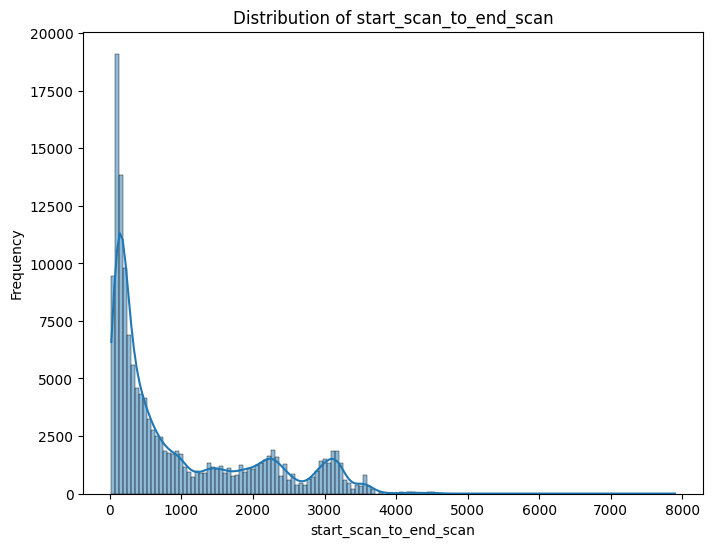

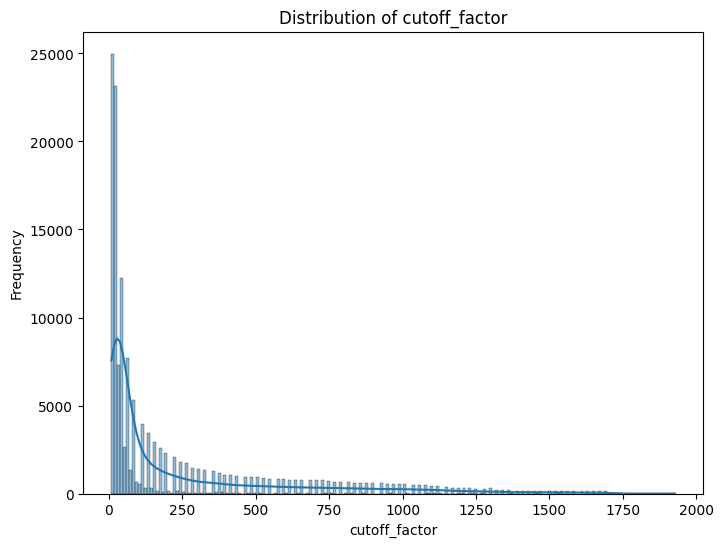

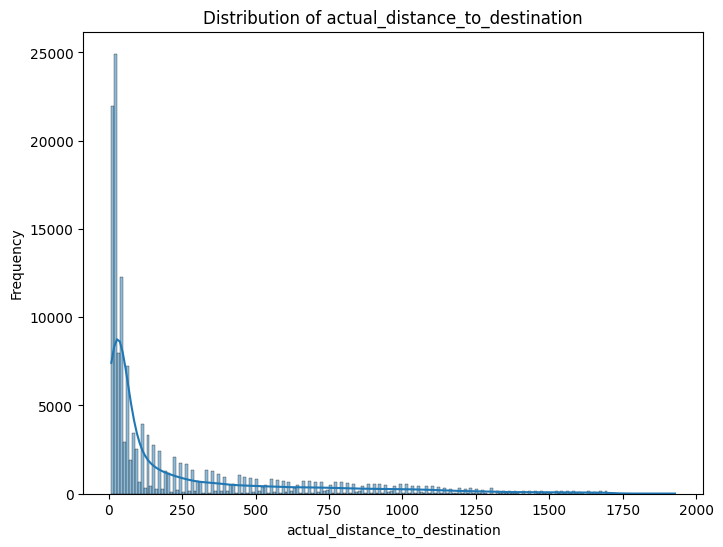

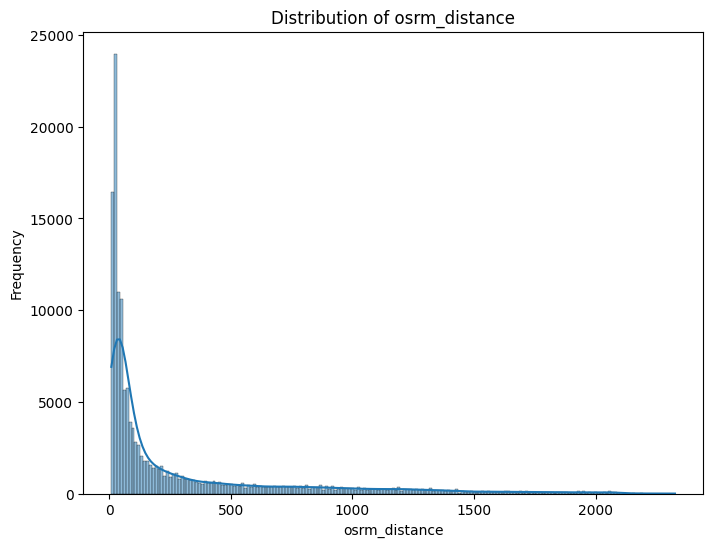

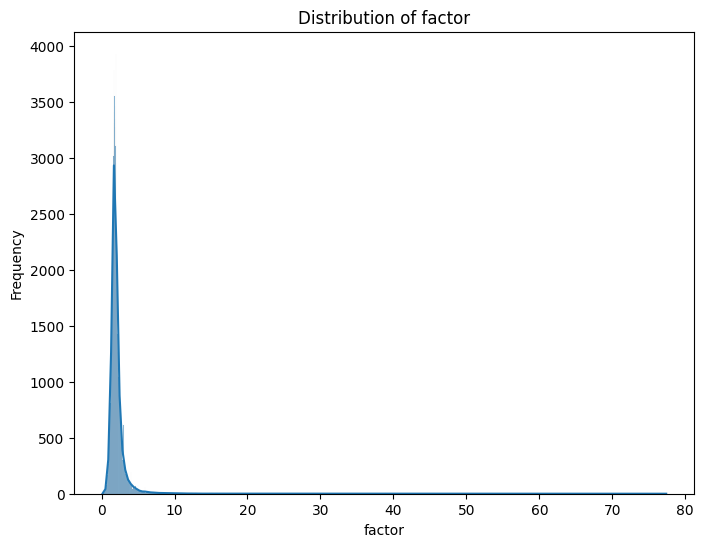

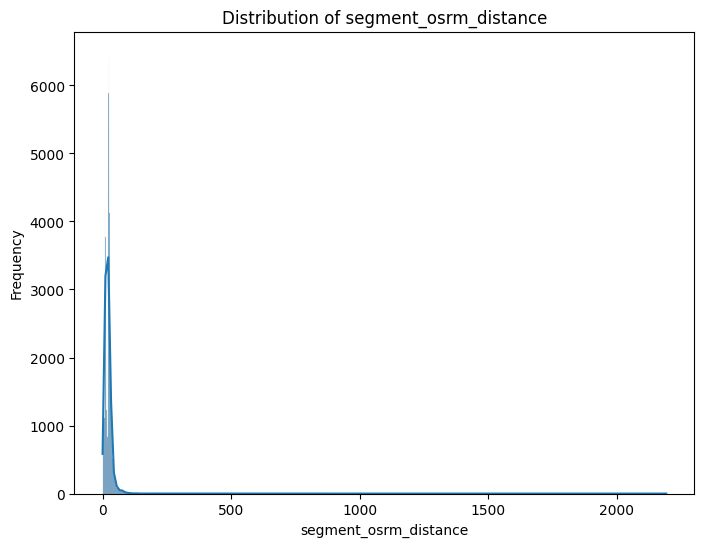

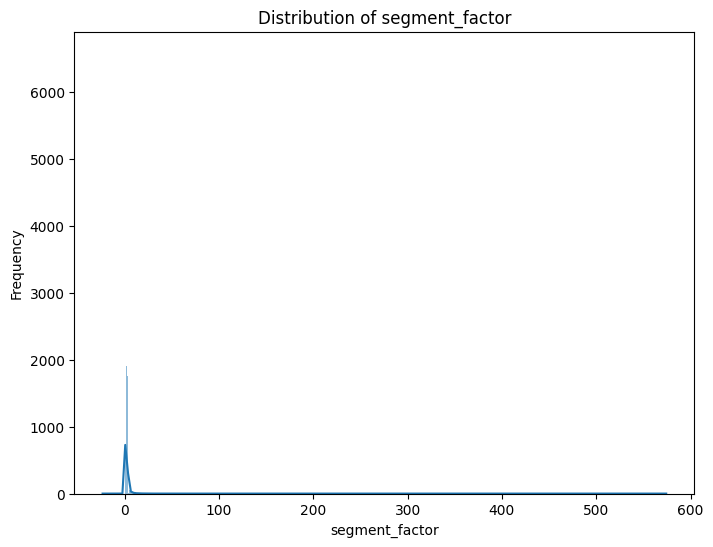

In [ ]:
# Distribution plots for continuous variables
for col in continuous_vars:
 plt.figure(figsize=(8, 6))
 sns.histplot(df[col], kde=True)
 plt.title(f'Distribution of {col}')
 plt.xlabel(col)
 plt.ylabel('Frequency')
 plt.show()

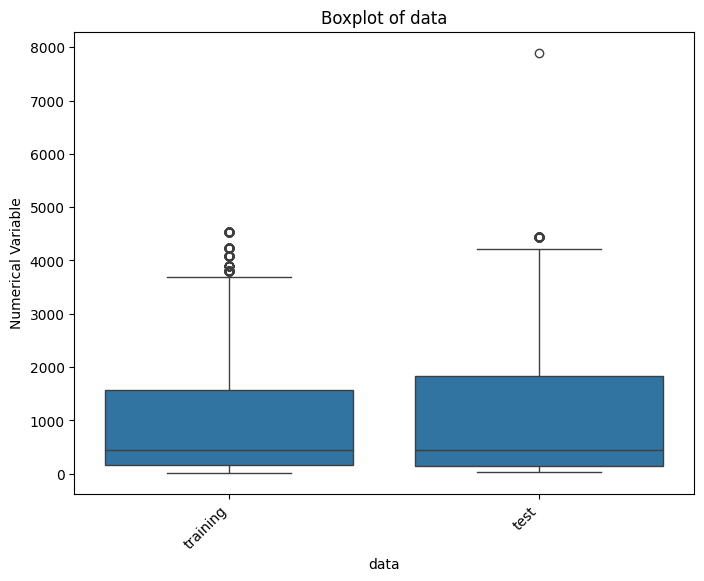

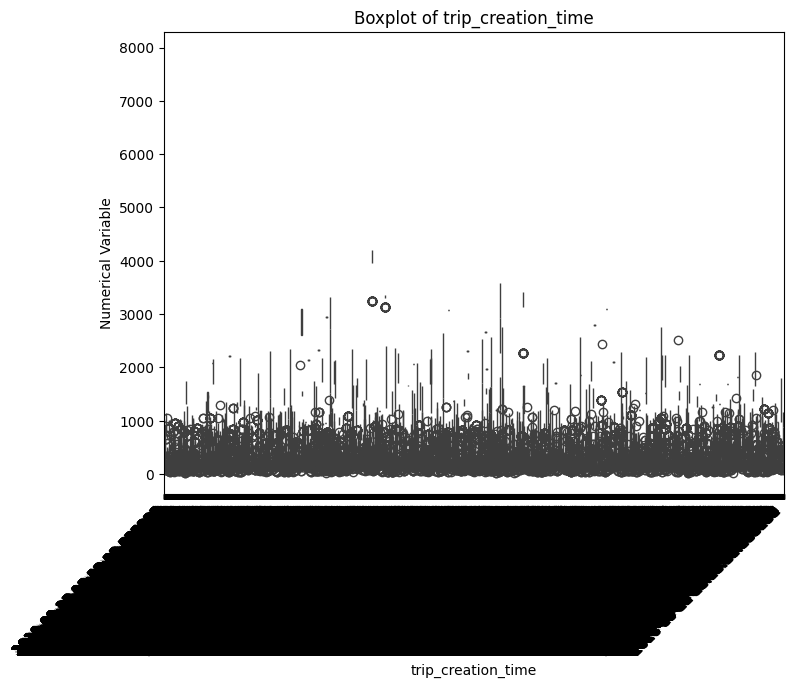

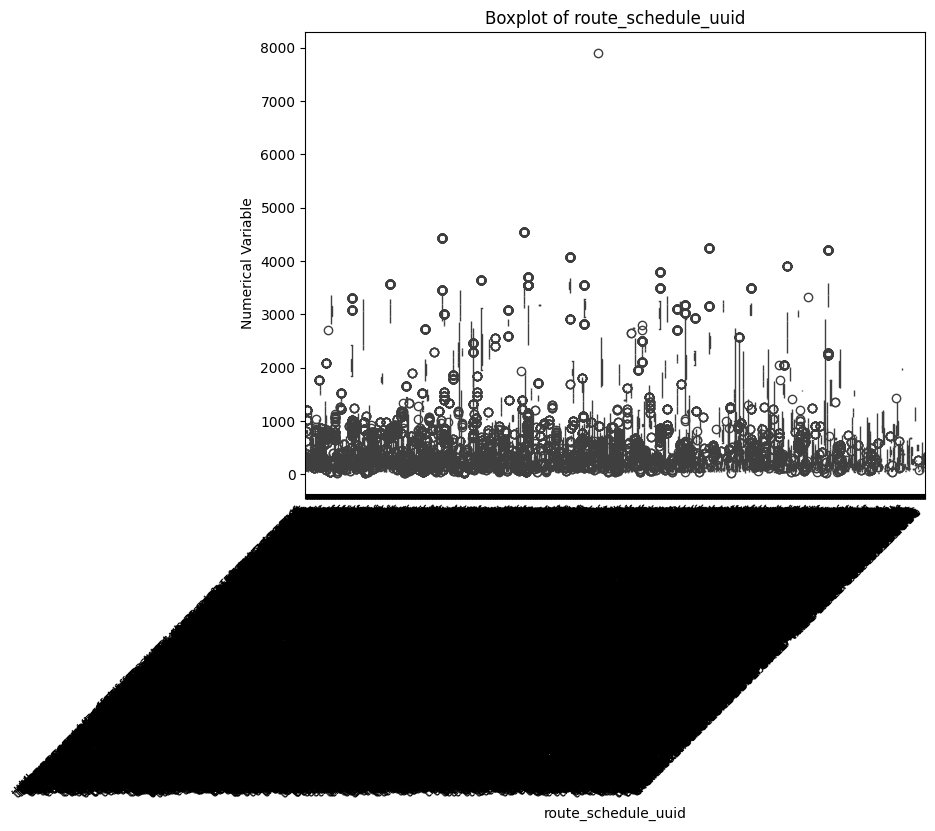

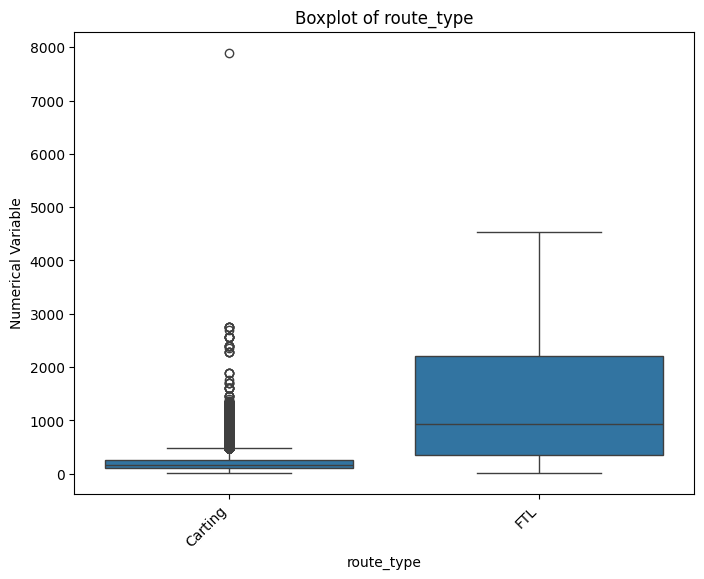

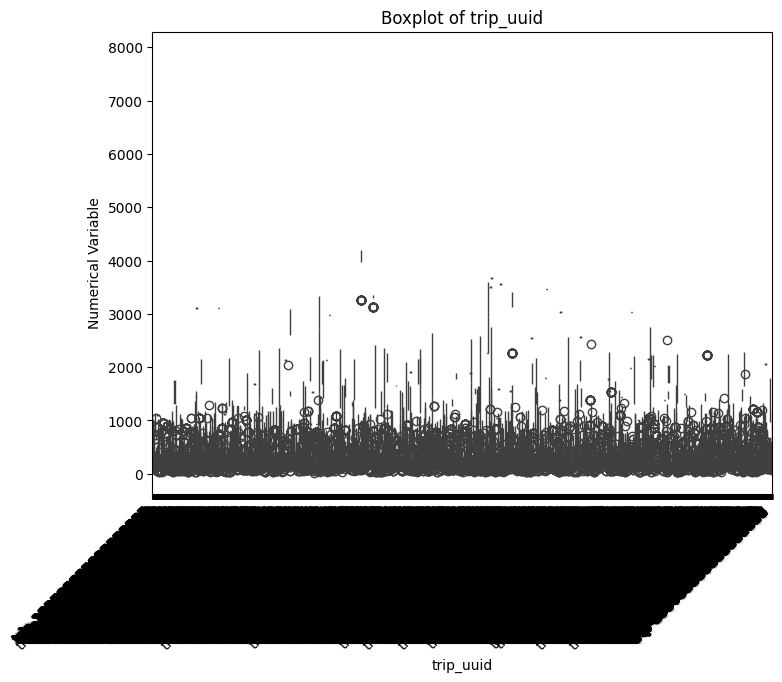

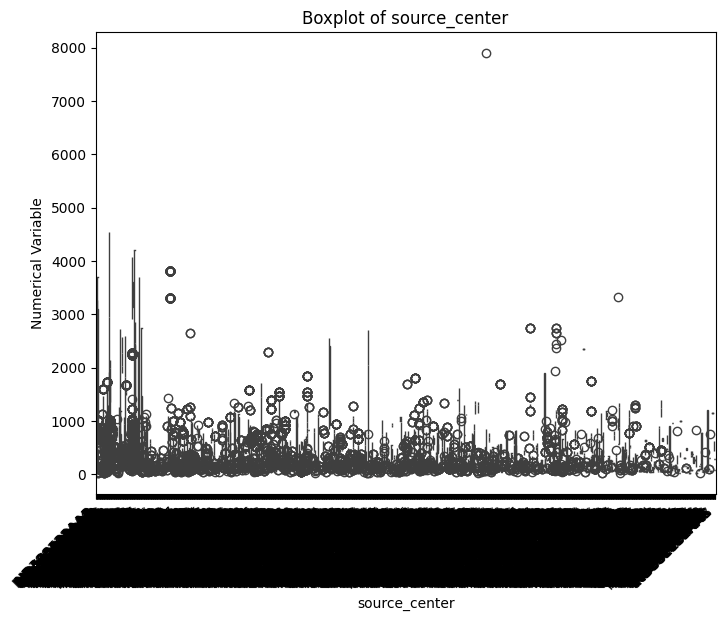

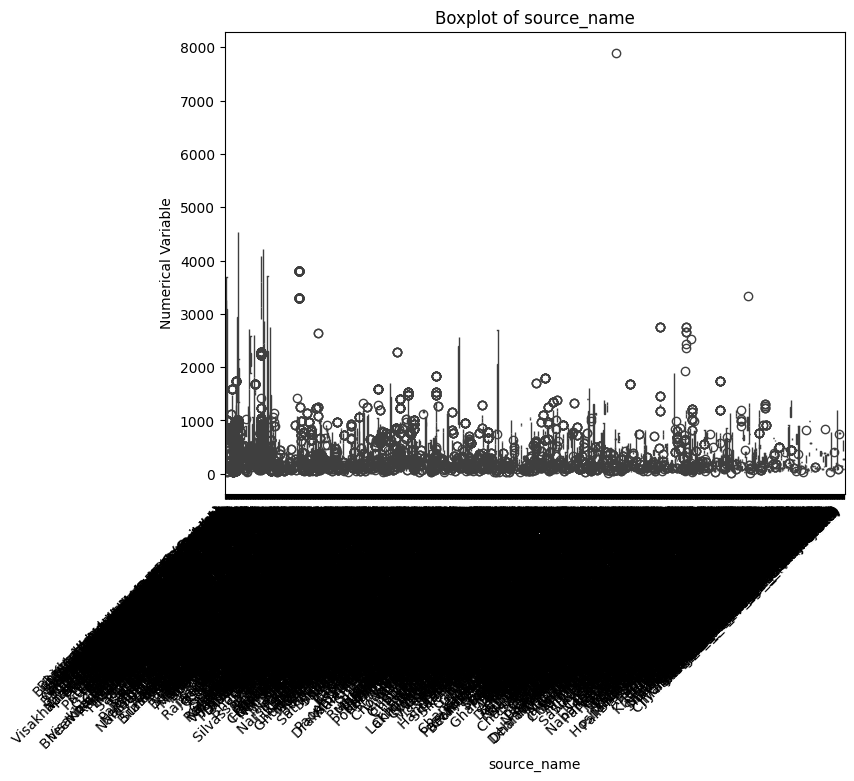

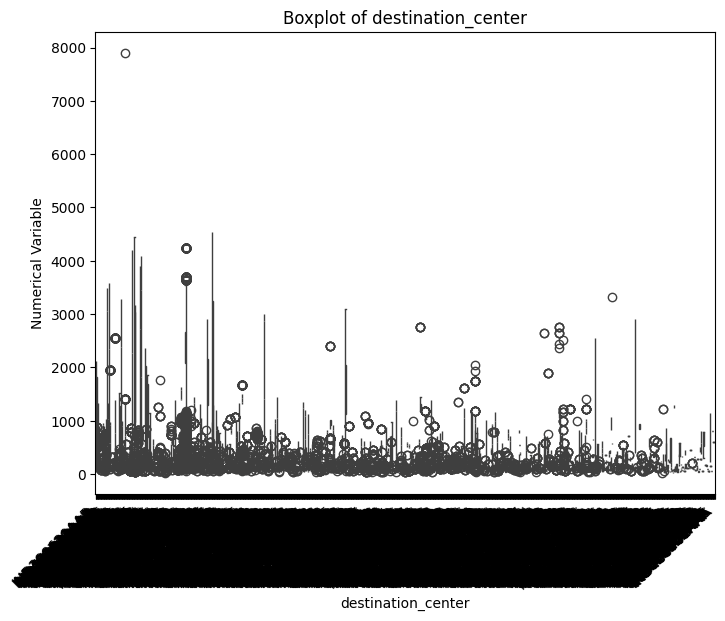

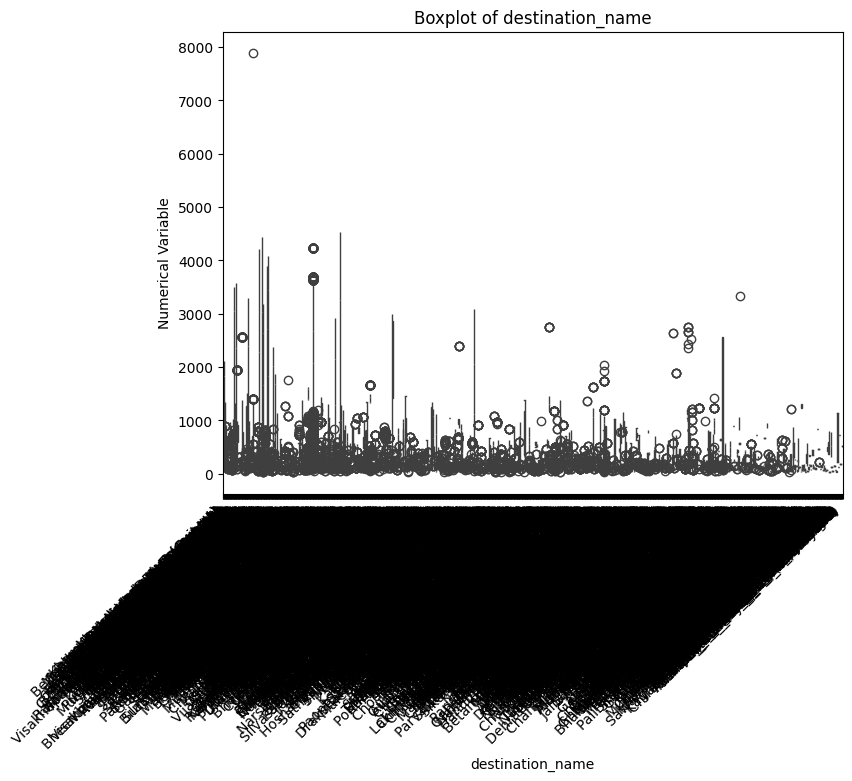

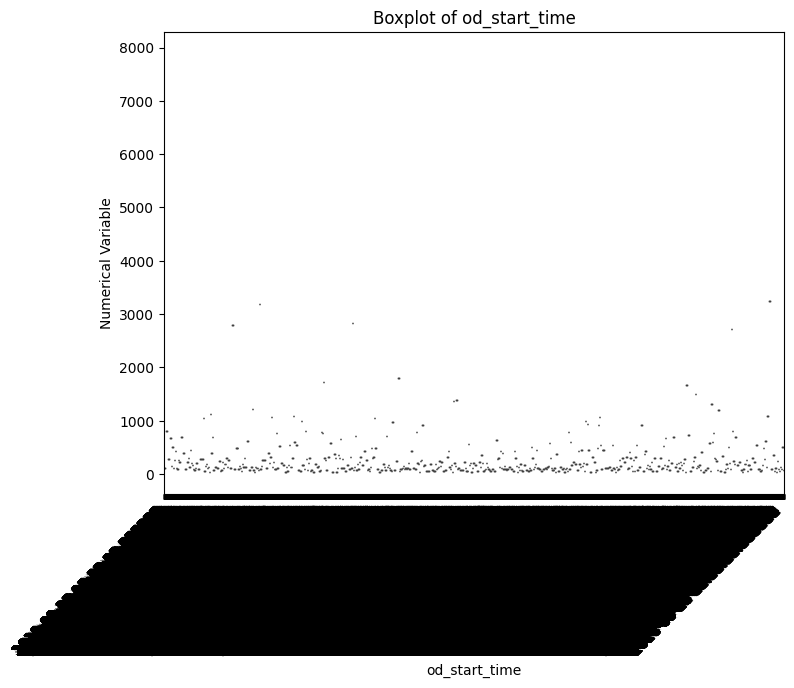

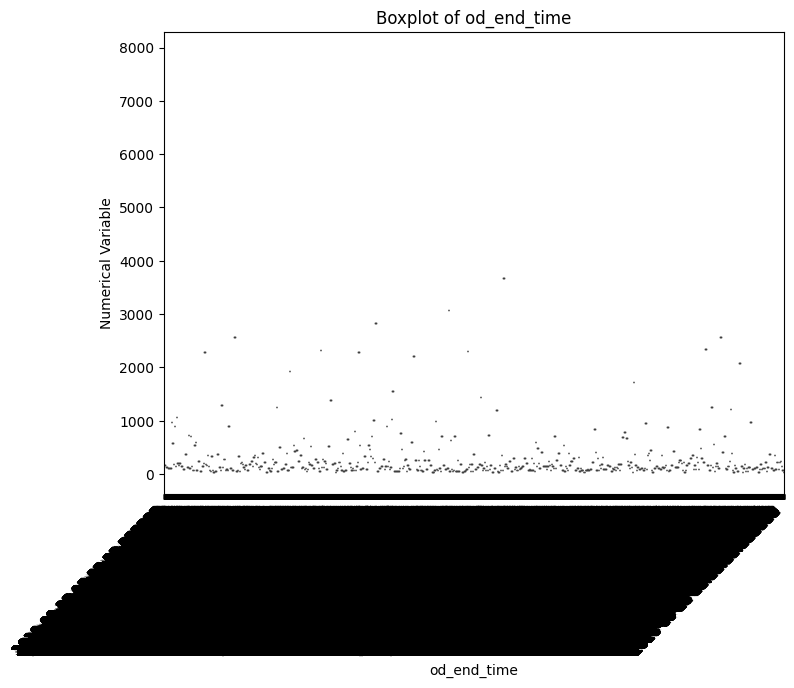

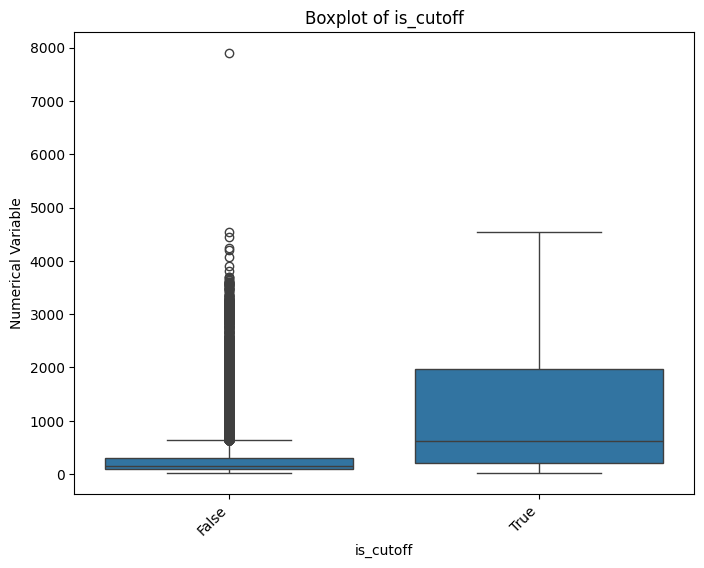

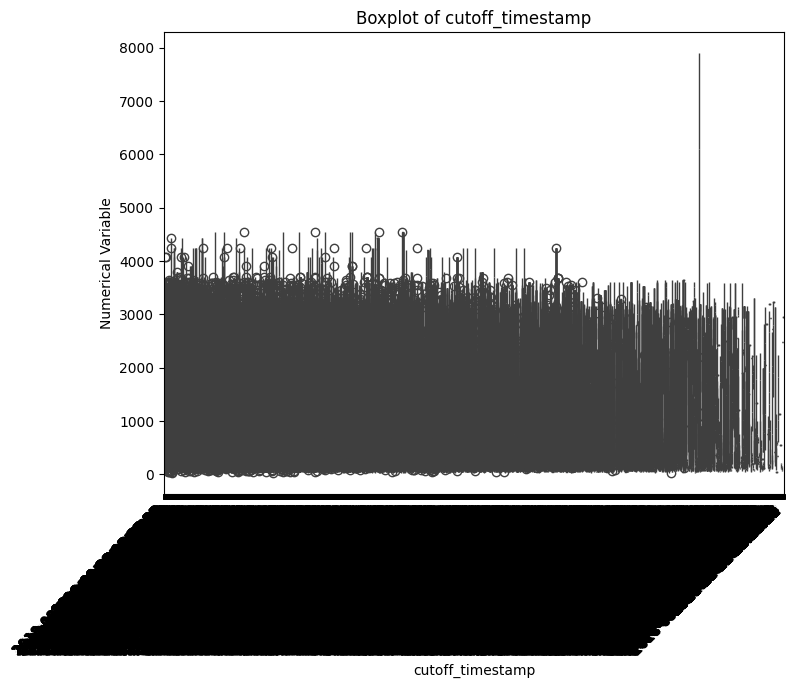

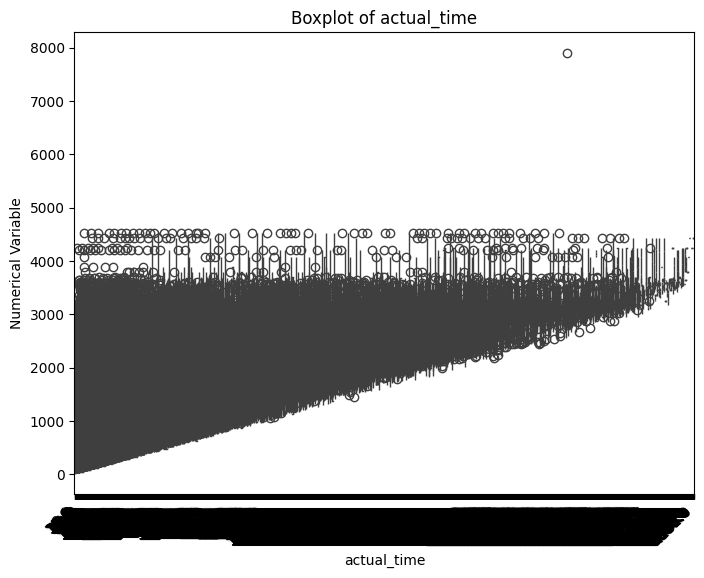

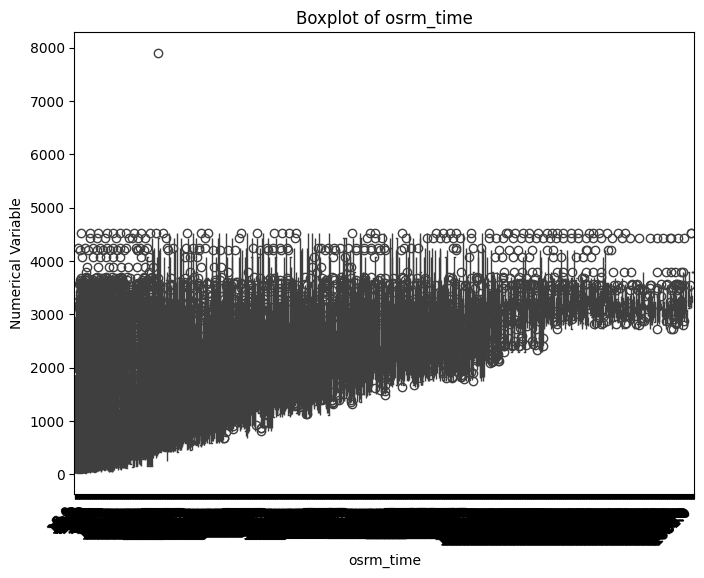

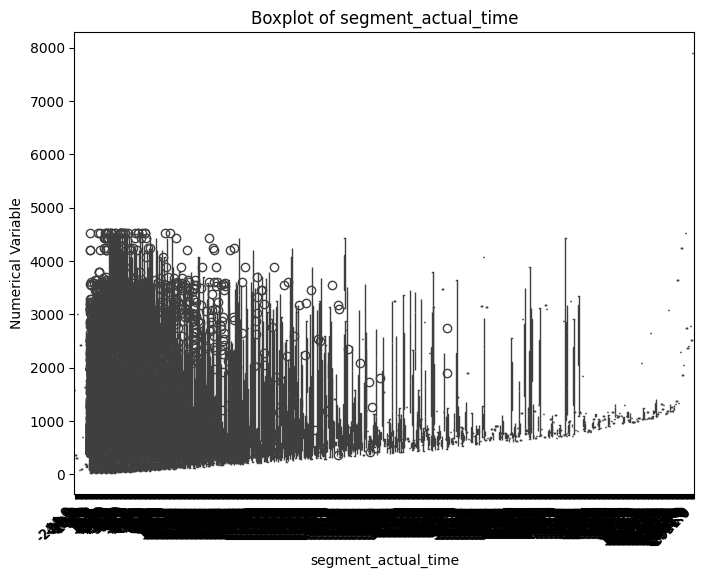

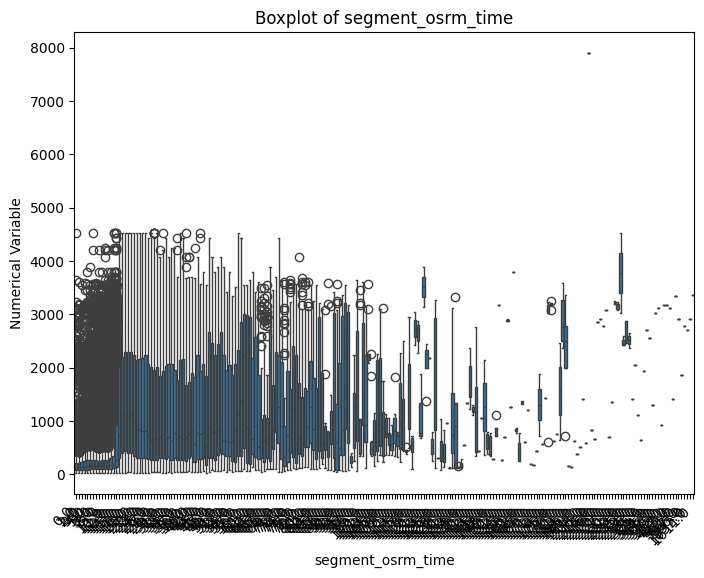

In [ ]:
# Boxplots for categorical variables
for col in categorical_vars:
 plt.figure(figsize=(8, 6))
 sns.boxplot(x=col, y=df.select_dtypes(include=['number']).iloc[:, 0], data=df) # Replace with a suitable numerical column if needed.
 plt.title(f'Boxplot of {col}')
 plt.xlabel(col)
 plt.ylabel('Numerical Variable') # Update label
 plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
 plt.show()

**Insights based on EDA**

*   actual_distance_to_destination, osrm_distance, segment_osrm_distance likely right-skewed with potential outliers at higher values, indicating a mix of short and long trips/segments.
* Most deliveries cover short distances, with a notable number of longer trips and potential outliers in distance.
* Planned OSRM distances and times provide a baseline, and potential outliers exist in these planned values as well.
* Segment-level distances show the breakdown of trips, with some segments being notably long.
* The distribution of the unknown 'cutoff_factor' needs examination to understand its typical values and extreme cases.

* The distribution of a key numerical performance metric differs significantly between the training and test datasets, requiring attention for model reliability.
* Different route types (FTL vs. Carting) exhibit distinct performance characteristics in terms of the numerical metric.
* The occurrence of a cutoff event (is_cutoff) is clearly associated with a different distribution of the numerical performance metric.
* Specific source and destination locations are linked to varying performance levels, indicating geographical influence on deliveries.
* Individual trips can have outlier performance, warranting investigation.
* The unknown 'factor' and 'segment_factor' are related to the distribution of the numerical performance metric.

# 2. Feature Creation

Relationship between Features: Using Correlation matrix

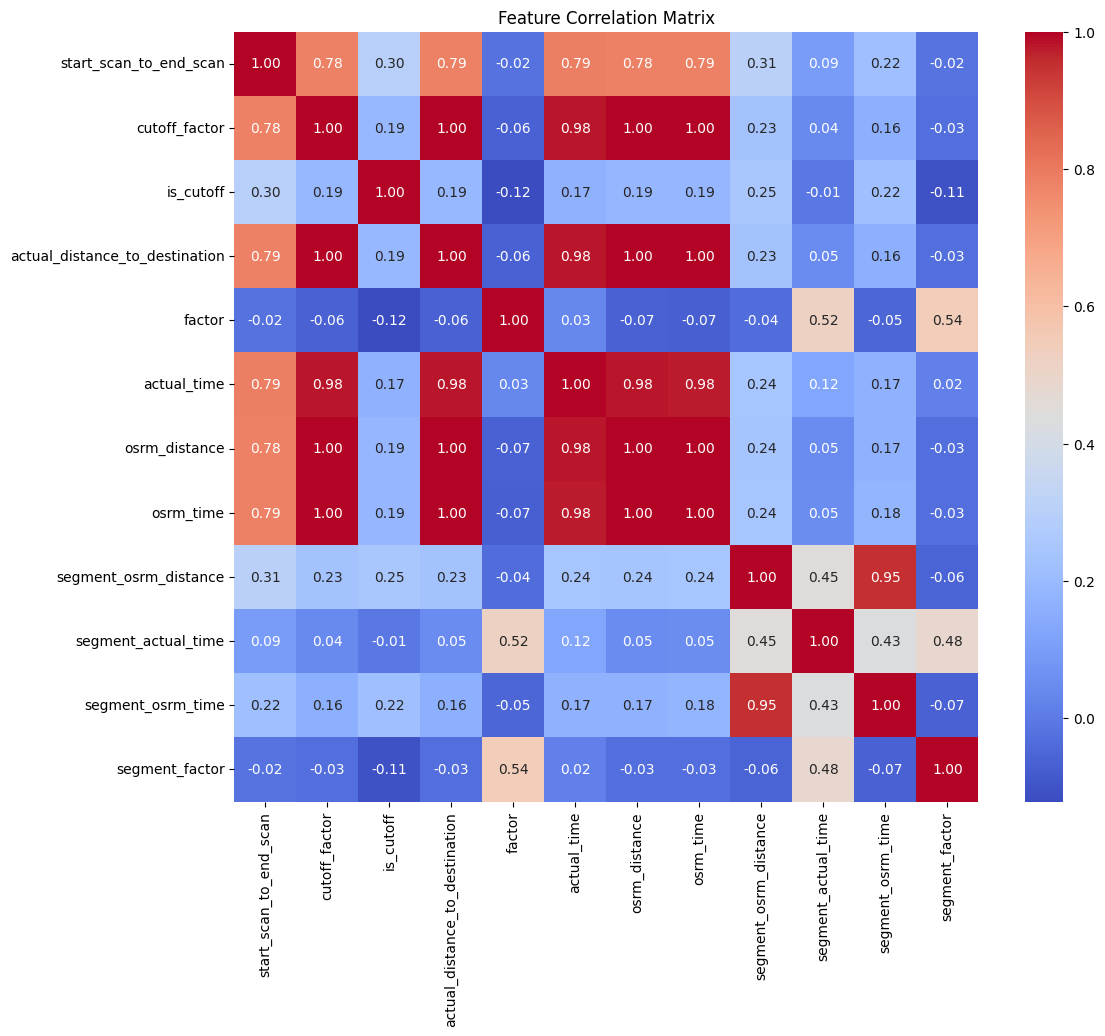

In [ ]:
#using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df1[['start_scan_to_end_scan','cutoff_factor','is_cutoff','actual_distance_to_destination','factor','actual_time','osrm_distance','osrm_time','segment_osrm_distance','segment_actual_time','segment_osrm_time','segment_factor']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

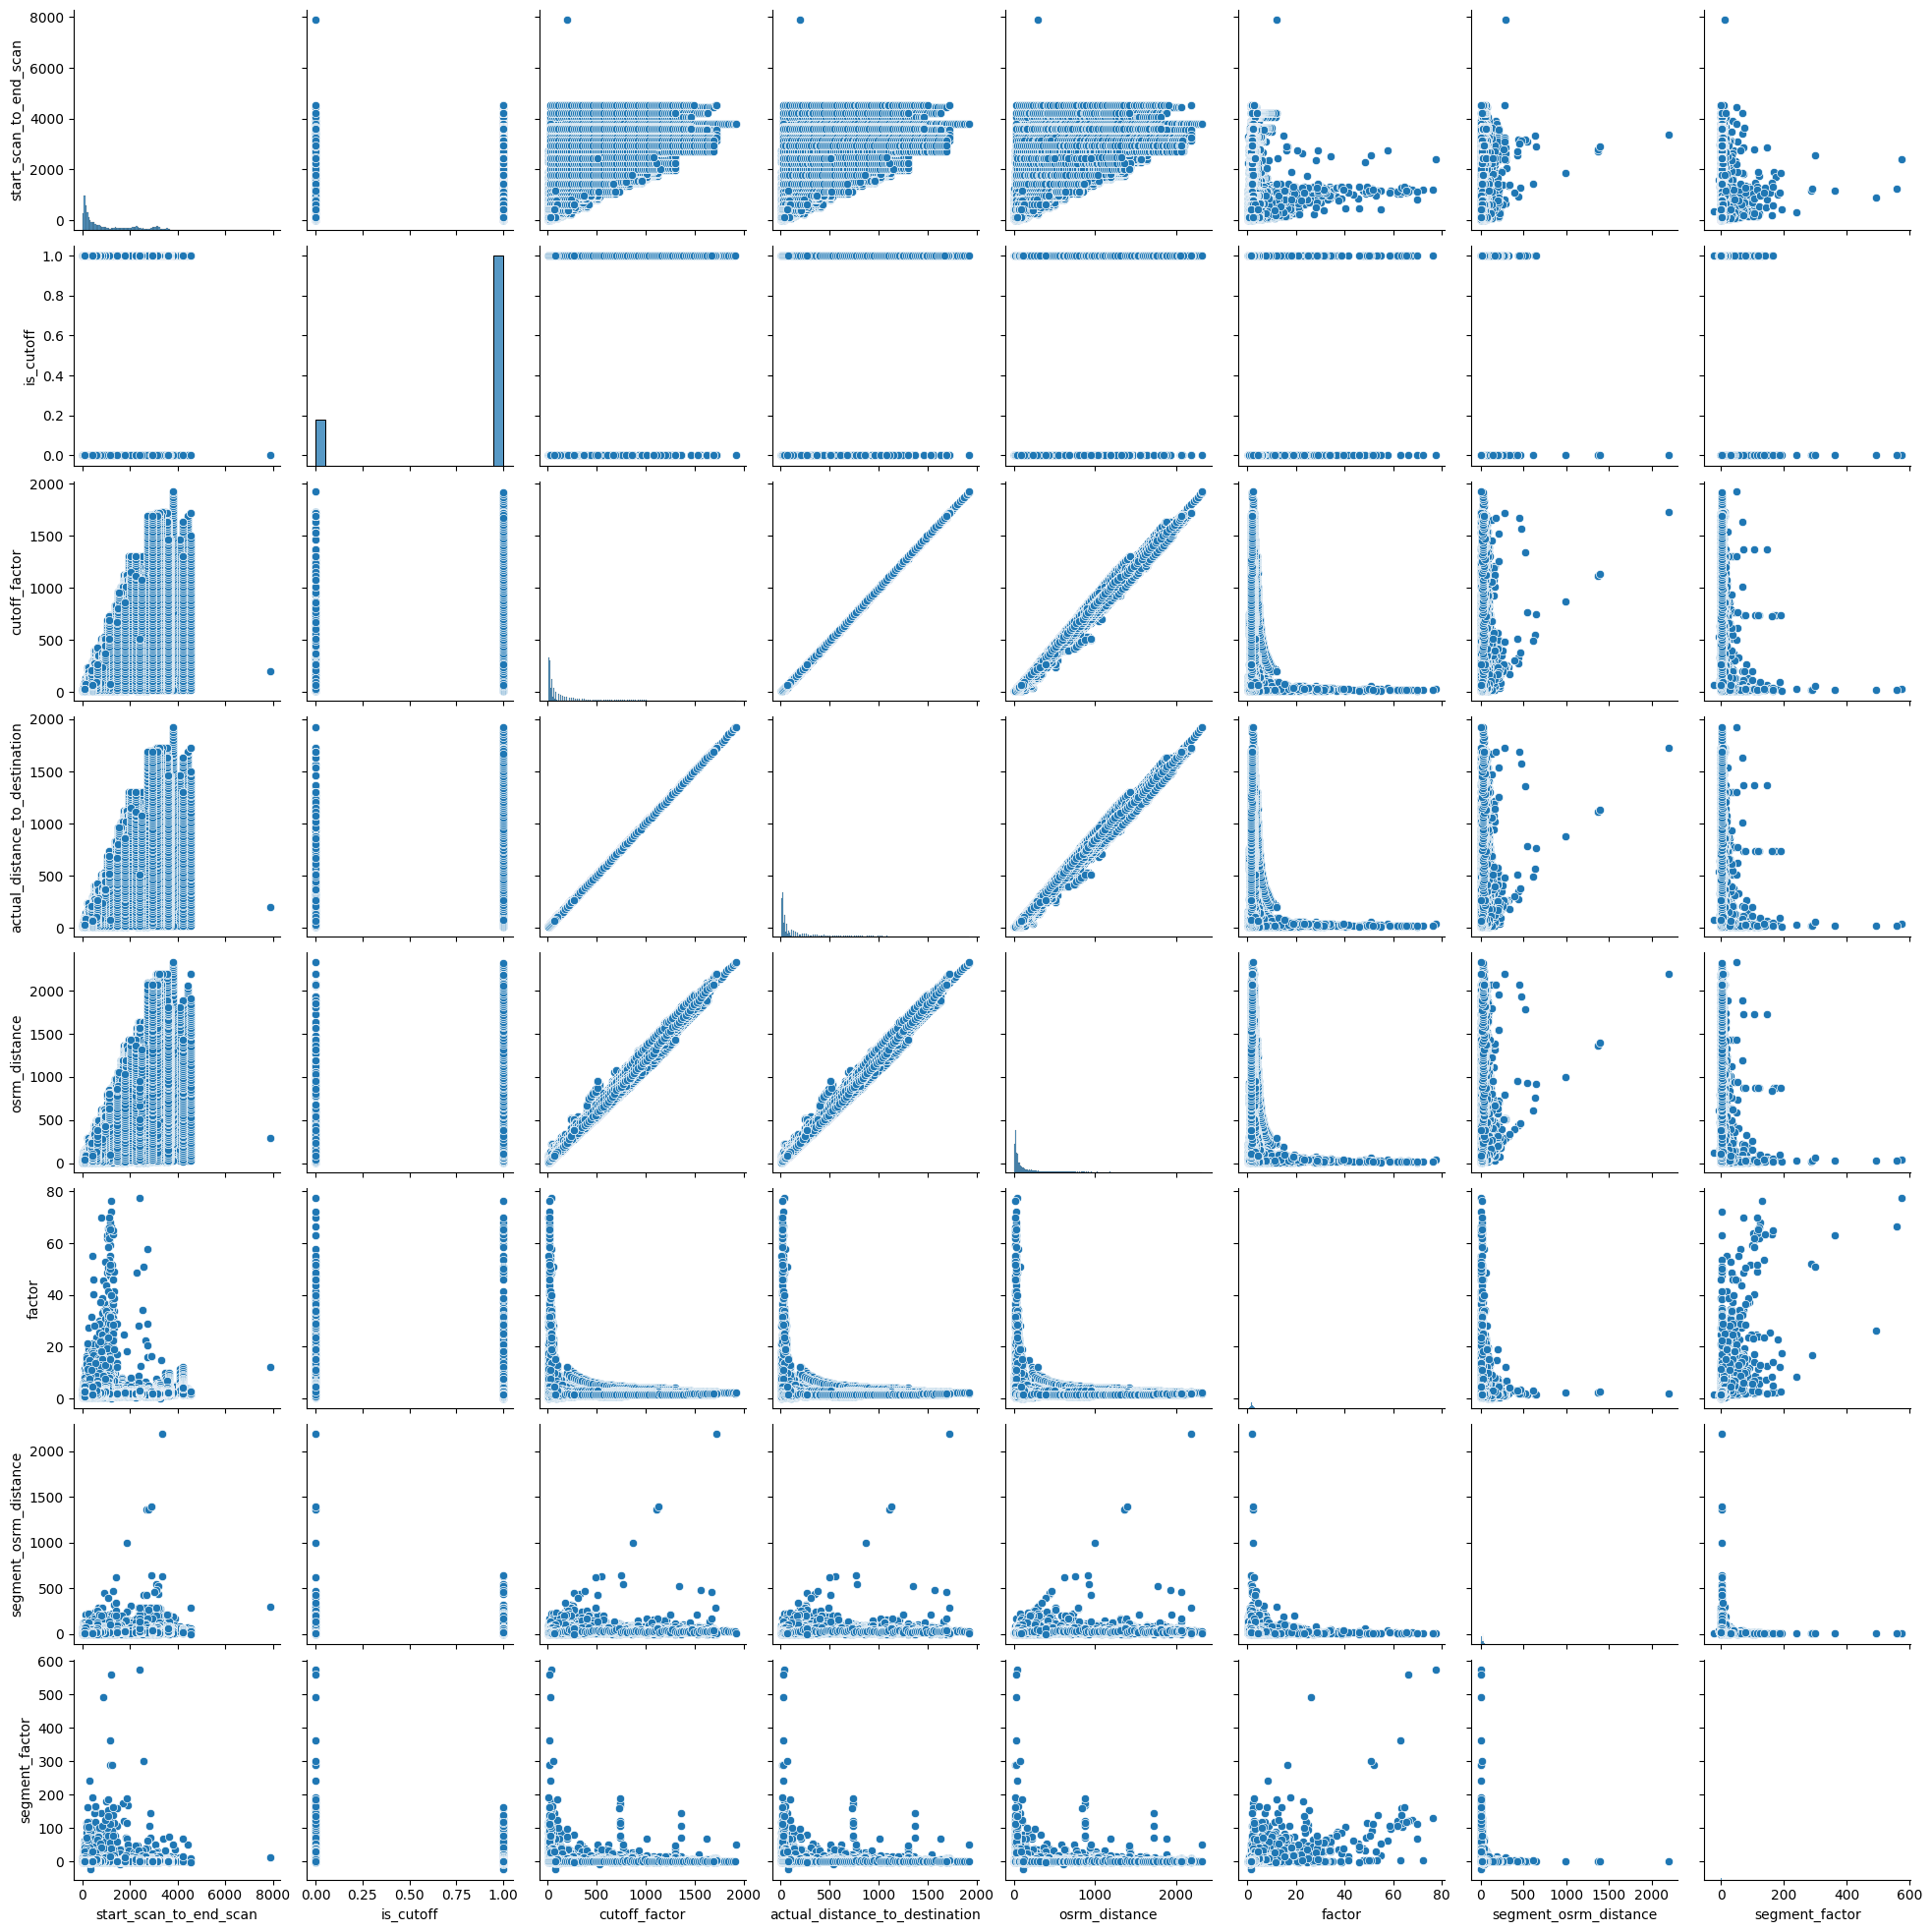

In [ ]:
#displaying the pairplot
sns.pairplot(df1)
plt.show() # Display the plot

**Column Normalization /Column Standardization:**

Normalization is better when the data does not follow a normal
distribution.
Normalization (Min-Max Scaling):

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]
scaler = MinMaxScaler()
df_scaled_numerical = pd.DataFrame(scaler.fit_transform(df_numerical),
columns=numerical_features, index=df.index) # keep the original index for later merging
df_scaled = pd.concat([df_scaled_numerical,
df.drop(columns=numerical_features)], axis=1)

**Standardization is better when data is normally distributed:**

Standardization (Z-score scaling): Centers values around mean = 0,
standard deviation = 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_features, index=df.index) # maintain the original index
df_final = pd.concat([df_standardized, df.drop(columns=numerical_features)], axis=1)

Handling categorical values:

Label Encoding (for ordinal categories):

In [ ]:
from sklearn.preprocessing import LabelEncoder
actual_column_name = 'actual_time'
encoder = LabelEncoder()
df[actual_column_name] = encoder.fit_transform(df[actual_column_name])

**One-Hot Encoding (for non-ordinal categories):**

In [ ]:
df_encoded = pd.get_dummies(df, columns=["data"], drop_first=True)

# 3. Merging of rows and aggregation of fields


The **merge()** function takes two data frames as input and returns a new
data frame that contains the merged data. To merge the data frames on
multiple columns, we need to specify the names of the common columns
as a list in the on parameter of the merge() function.

In [ ]:
# Corrected the variable name to delhivery_data
delhivery_data = {
"data": ["test", "training"], # Corrected the strings to use standard double quotes
"start_scan_to_end_scan": [80, 108], # Fixed missing comma and potential float error
"route_type": ["carting", "FTL"]} #Corrected the strings to use standard double quotes and removed extra characters
df = pd.DataFrame(delhivery_data) # Corrected variable name here as well
df_aggregated = df.groupby("data", as_index=False).agg({"start_scan_to_end_scan": "sum"}) # Summing numeric values
# Removed 'Category' aggregation as it's not in the original data
print(df_aggregated)


       data  start_scan_to_end_scan
0      test                      80
1  training                     108


Rows are classified with respect to the data column and linked accordingly for merging.

If we have exact duplicate rows and just want to remove duplicates, we can use:


In [ ]:
df1 = df.drop_duplicates()

This option is very useful when there is large dataset and we want to remove unnecessary rows with duplicate values from a column.


If we want to merge only specific rows that have duplicate values in one column while keeping others:

In [ ]:
df2 = df.groupby("osrm_time").sum().reset_index()
df2

osrm_time                                               data  \
0           6.0  testtrainingtrainingtesttesttesttrainingtraini...   
1           7.0  trainingtesttrainingtrainingtrainingtrainingte...   
2           8.0  testtrainingtrainingtrainingtrainingtesttesttr...   
3           9.0  trainingtrainingtrainingtrainingtrainingtraini...   
4          10.0  trainingtesttrainingtesttrainingtrainingtraini...   
...         ...                                                ...   
1526     1629.0                                           training   
1527     1650.0                                           training   
1528     1664.0                                           training   
1529     1682.0                                           training   
1530     1686.0                                           training   

                                     trip_creation_time  \
0     2018-09-27 02:48:03.3919662018-09-24 04:13:40....   
1     2018-09-26 04:55:30.5388132018-10-01 01:18:55....   
2     2018-09-27 02:48:03.3919662018-09-21 22:07:26....   
3     2018-09-12 01:33:48.7113502018-09-25 15:29:19....   
4     2018-09-12 01:33:48.7113502018-09-27 14:16:14....   
...                                                 ...   
1526                         2018-09-21 18:37:09.322207   
1527                         2018-09-21 18:37:09.322207   
1528                         2018-09-21 18:37:09.322207   
1529                         2018-09-21 18:37:09.322207   
1530                         2018-09-21 18:37:09.322207   

                                    route_schedule_uuid  \
0     thanos::sroute:872d9762-5527-44ee-9fc9-4457999...   
1     thanos::sroute:418b2f33-1b2d-450b-b84a-c3ea278...   
2     thanos::sroute:872d9762-5527-44ee-9fc9-4457999...   
3     thanos::sroute:5f7d8d49-ae14-430e-9333-37361e1...   
4     thanos::sroute:5f7d8d49-ae14-430e-9333-37361e1...   
...                                                 ...   
1526  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
1527  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
1528  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
1529  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
1530  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   

                                             route_type  \
0     CartingCartingCartingCartingCartingCartingCart...   
1     CartingCartingCartingCartingCartingCartingCart...   
2     CartingCartingCartingCartingCartingCartingCart...   
3     CartingCartingCartingCartingCartingCartingCart...   
4     CartingCartingCartingCartingCartingCartingCart...   
...                                                 ...   
1526                                                FTL   
1527                                                FTL   
1528                                                FTL   
1529                                                FTL   
1530                                                FTL   

                                              trip_uuid  \
0     trip-153801648339170824trip-153776242019654929...   
1     trip-153793773053856692trip-153835673562246389...   
2     trip-153801648339170824trip-153756764648589191...   
3     trip-153671602871109556trip-153788935964686391...   
4     trip-153671602871109556trip-153805777481903807...   
...                                                 ...   
1526                            trip-153755502932196495   
1527                            trip-153755502932196495   
1528                            trip-153755502932196495   
1529                            trip-153755502932196495   
1530                            trip-153755502932196495   

                                          source_center  \
0     IND607106AAAIND121001AAAIND623315AABIND410505A...   
1     IND380054AAAIND530012AAAIND742148AAAIND742225A...   
2     IND606201AACIND751015AAAIND531163AAAIND122002A...   
3     IND362265AAAIND000000ACKIND721134AABIND515134A...   
4     IND362560AAAIND600056AABIND4

**Aggregration:**

In [ ]:
# Perform aggregation based on available columns
try:
  df_aggregated = df.groupby("route_type", as_index=False).agg({"start_scan_to_end_scan": "sum"})
  print(df_aggregated)
except KeyError as e:
 print(f"Error: Column '{e}' not found in the DataFrame. Please check your column names.")
except Exception as e:
 print(f"An error occurred during aggregation: {e}")

  route_type  start_scan_to_end_scan
0    Carting               9428954.0
1        FTL             129826331.0


# 4. Comparison & Visualization of time and distance fields

Comparison of Time field

In [ ]:
# List of numerical columns to plot
numerical_cols_to_plot = ['actual_time', 'osrm_time', 'segment_actual_time','segment_osrm_time']

# Melt the DataFrame
# id_vars is optional here, but good practice if you have other columns you want to keep
df_melted = df.melt(value_vars=numerical_cols_to_plot,
                    var_name='Variable',   # Name for the new column that will hold the original column names
                    value_name='Value')      # Name for the new column that will hold the numerical values

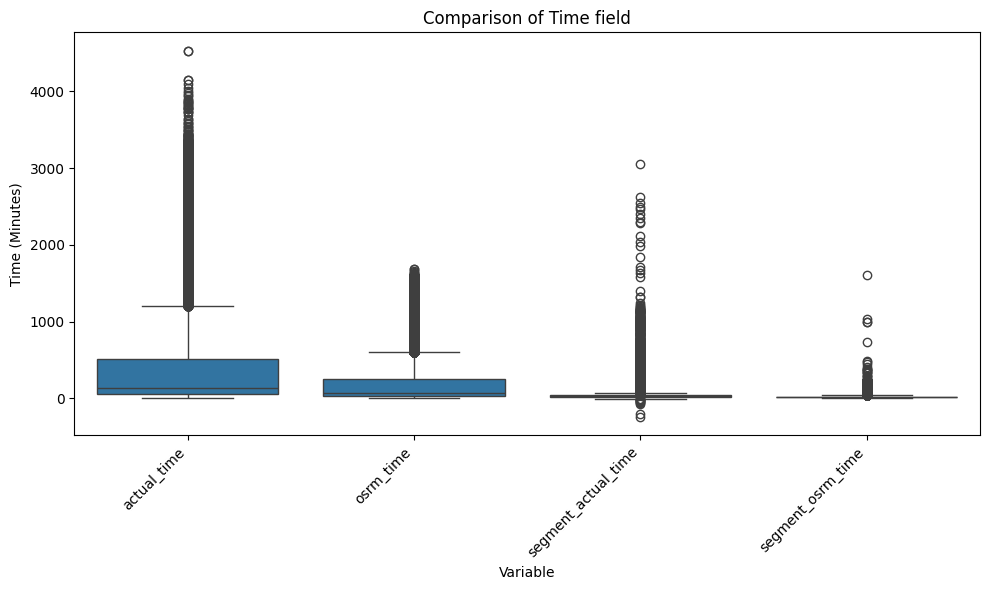

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.title('Comparison of Time field')
plt.ylabel('Time (Minutes)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout
plt.show()

Comparison of Distnace Fields

In [ ]:
# List of numerical columns to plot
numerical_cols_to_plot1 = ['actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance']

# Melt the DataFrame
# id_vars is optional here, but good practice if you have other columns you want to keep
df_melted1 = df.melt(value_vars=numerical_cols_to_plot1,
                    var_name='Variable',   # Name for the new column that will hold the original column names
                    value_name='Value')      # Name for the new column that will hold the numerical values

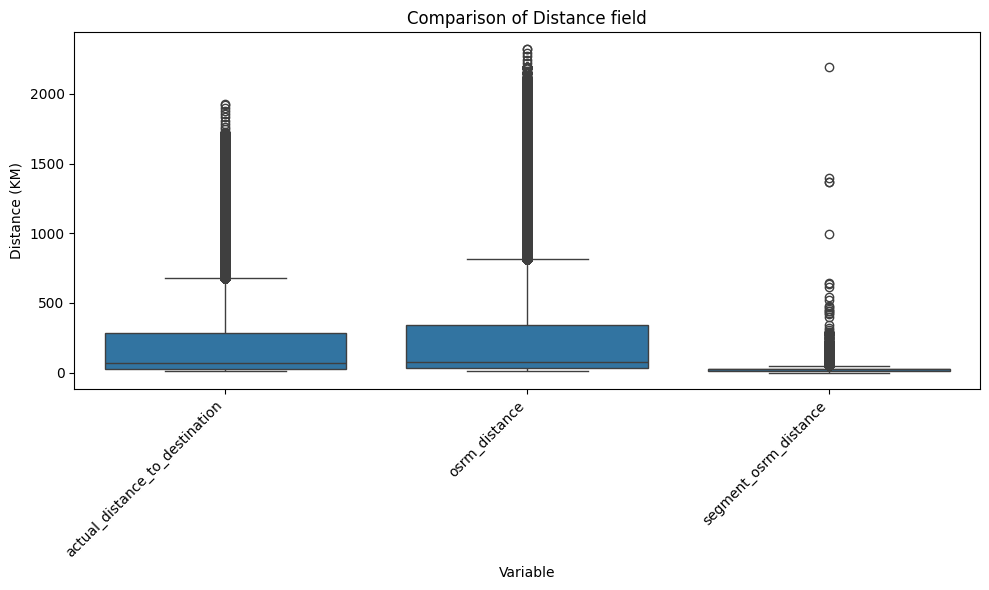

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.boxplot(x='Variable', y='Value', data=df_melted1)
plt.title('Comparison of Distance field')
plt.ylabel('Distance (KM)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout
plt.show()

**Time Fields:**

* The average actual_time is 416.9 minutes (~ 7 hours), whereas osrm_time (estimated time from OSRM) is 213.9 minutes (~3.5 hours), indicating significant delays.
* segment_actual_time (actual time for route segments) averages 36.2 minutes, while segment_osrm_time(estimated segment time) is 18.5 minutes, showing a similar discrepancy.
* There are negative values in segment_actual_time, which may indicate data errors or incorrect calculations.

**Distance Fields:**

* actual_distance_to_destination has an average of 234 km, whereas osrm_distance is 284.8 km, showing that actual travel distances are often shorter.
* segment_osrm_distance (average 22.8 km) appears reasonable but has a maximum value of 2191.4 km, which suggests possible data anomalies.

**Visualizations:**

* **Time boxplot:** Shows that actual times have a wider distribution, and more outliers compared to OSRM-estimated times.
* **Distance boxplot:** Indicates that actual distances tend to be lower than OSRM distances, with some extreme outliers.




# 5. Missing values Treatment & Outlier treatment

To perform missing value treatment and outlier detection for the dataset.
Steps:
1. Handle Missing Values:
  * Identify missing values and determine their percentage.
  * Impute or drop values based on their significance.
2. Outlier Detection & Treatment:
  * Use statistical methods (IQR, Z-score) to detect outliers.
  * Decide whether to cap, transform, or remove them.

**Missing Values Analysis:**
Missing Values:
* source_name (293 missing)
* destination_name (261 missing)

Outlier-Prone Columns:
* Numerical columns: actual_distance_to_destination, actual_time, osrm_time, osrm_distance, factor, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_factor
* Need to check for extreme values in these.


**Steps for Handling Missing Values in the Dataset**
1. Identify Missing Values
    * Used .info() to check the count of non-null values in each column.
    * Found missing values in source_name (293) and destination_name (261).
2. Drop Completely Empty Columns if any
3. Fill Missing Values in Categorical Columns
  * Replaced missing values in source_name and destination_name with "Unknown" to retain data integrity.
4. Validate Changes
  * Ensured no missing values remained in the dataset after the replacements.

This approach ensures minimal data loss while maintaining dataset usability.

In [ ]:
df1.fillna({'source_name' : 'Unknown'}, inplace=True) #replacing the null values for the column source_name with "Unknown"
df1.fillna({'destination_name' : 'Unknown'}, inplace=True) #replacing the null values for the column destination_name with "Unknown"

In [ ]:
df1.isna().sum() #valiating

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

We have successfully replaced the Null values with "Unknown" and validated.

**Steps for Outlier Treatment**
1. Identify Outliers using the IQR Method
  * Selected numerical columns:actual_distance_to_destination, actual_time, osrm_time, osrm_distance, factor, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_factor.
  * Calculated Interquartile Range (IQR): IQR=Q3−Q1
  * Defined outlier thresholds: Lower Bound=Q1−1.5×IQR and Upper Bound=Q3+1.5×IQR
  * Any values outside these bounds were considered outliers.
2. Handle Outliers
  * Replaced values below the lower bound with the lower bound.
  * Replaced values above the upper bound with the upper bound.
  * This ensures that extreme values are adjusted without removing any data.
3. Validate Changes
  * Checked if extreme values were replaced within the
expected range.
  * Ensured data consistency after treatment.

This method effectively reduces the impact of extreme values while
preserving the overall distribution.

Let us consider the **"cutoff_factor**" column and do the outlier treatment.

In [ ]:
df1['cutoff_factor'].describe()

count    144867.000000
mean        232.926567
std         344.755577
min           9.000000
25%          22.000000
50%          66.000000
75%         286.000000
max        1927.000000
Name: cutoff_factor, dtype: float64

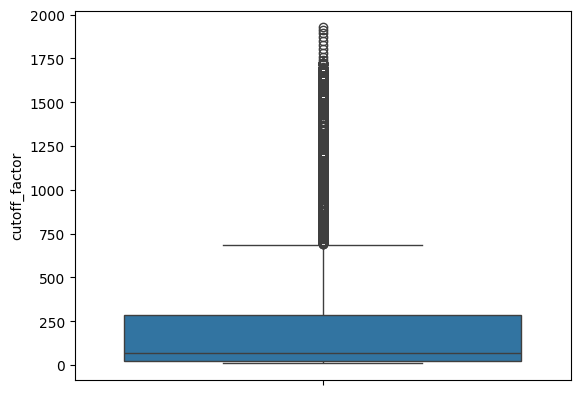

In [ ]:
sns.boxplot(df1['cutoff_factor']) #checking outlier visually
plt.show()

In [ ]:
#Calculationg the IQR
#IQR=Q3−Q1
IQR = 286.000000 - 22.000000
#Lower Bound=Q1−1.5×IQR
Lower_Bound = 22.000000 - 1.5 * IQR
#Upper Bound=Q3+1.5×IQR
Upper_Bound=286.000000 + 1.5 * IQR
print("IQR: ",IQR)
print("Lower Bound: ",Lower_Bound)
print("Upper Bound: ",Upper_Bound)

IQR:  264.0
Lower Bound:  -374.0
Upper Bound:  682.0


In [ ]:
#Since lowest value is 9.000000 so Lower_bound treatment is not required
#we will perform the upper bound treatment

df1['cutoff_factor'] = np.where(df1['cutoff_factor'] > Upper_Bound, Upper_Bound, df1['cutoff_factor'])

In [ ]:
df1['cutoff_factor'].describe() #we have successfully treated the "cutoff_factor" column

count    144867.000000
mean        190.291854
std         235.505504
min           9.000000
25%          22.000000
50%          66.000000
75%         286.000000
max         682.000000
Name: cutoff_factor, dtype: float64

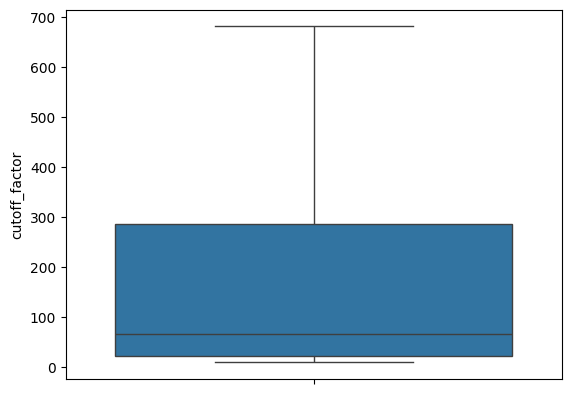

In [ ]:
sns.boxplot(df1['cutoff_factor']) #again checking outlier visually
plt.show()

**We can perform this steps for all the numerical column but we don't know if there is any real meaning or significance of these large/small values(outliers). So we will not perform these steps for all the columns.**

# 6. Checking relationship between aggregated fields

To check relationships between aggregated fields, we'll:
1. Identify Aggregated Fields – Fields that represent summarized
values.
2. Calculate Correlations – Find how strongly they are related.
3. Visualize Relationships – Use scatter plots or heatmaps for
better insights.

Identify the key aggregated fields and then analysing their relationships
will help in this case:

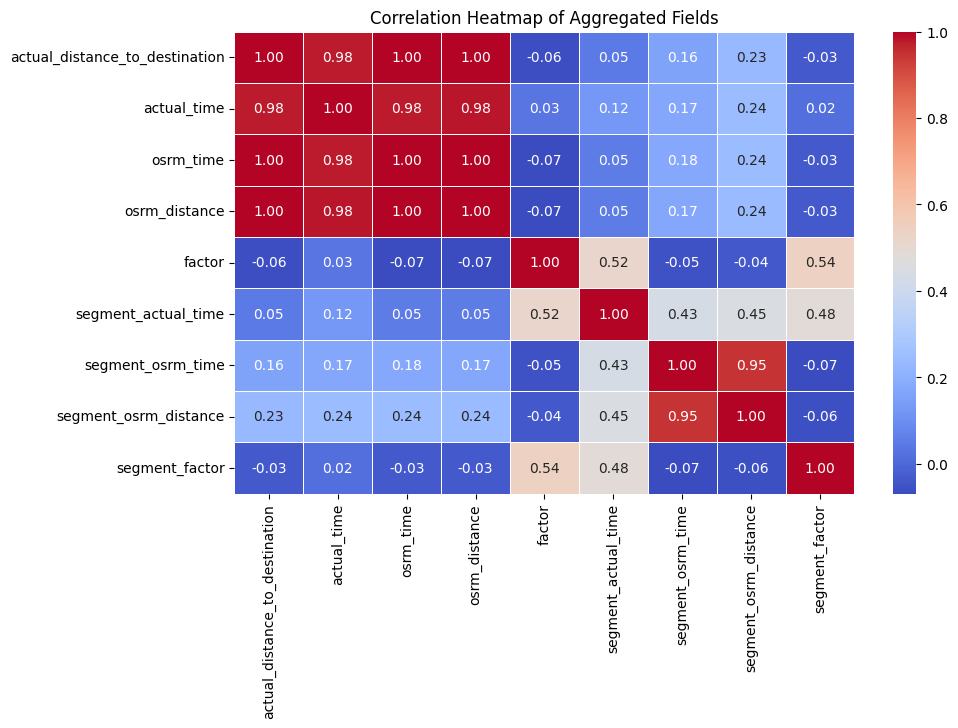

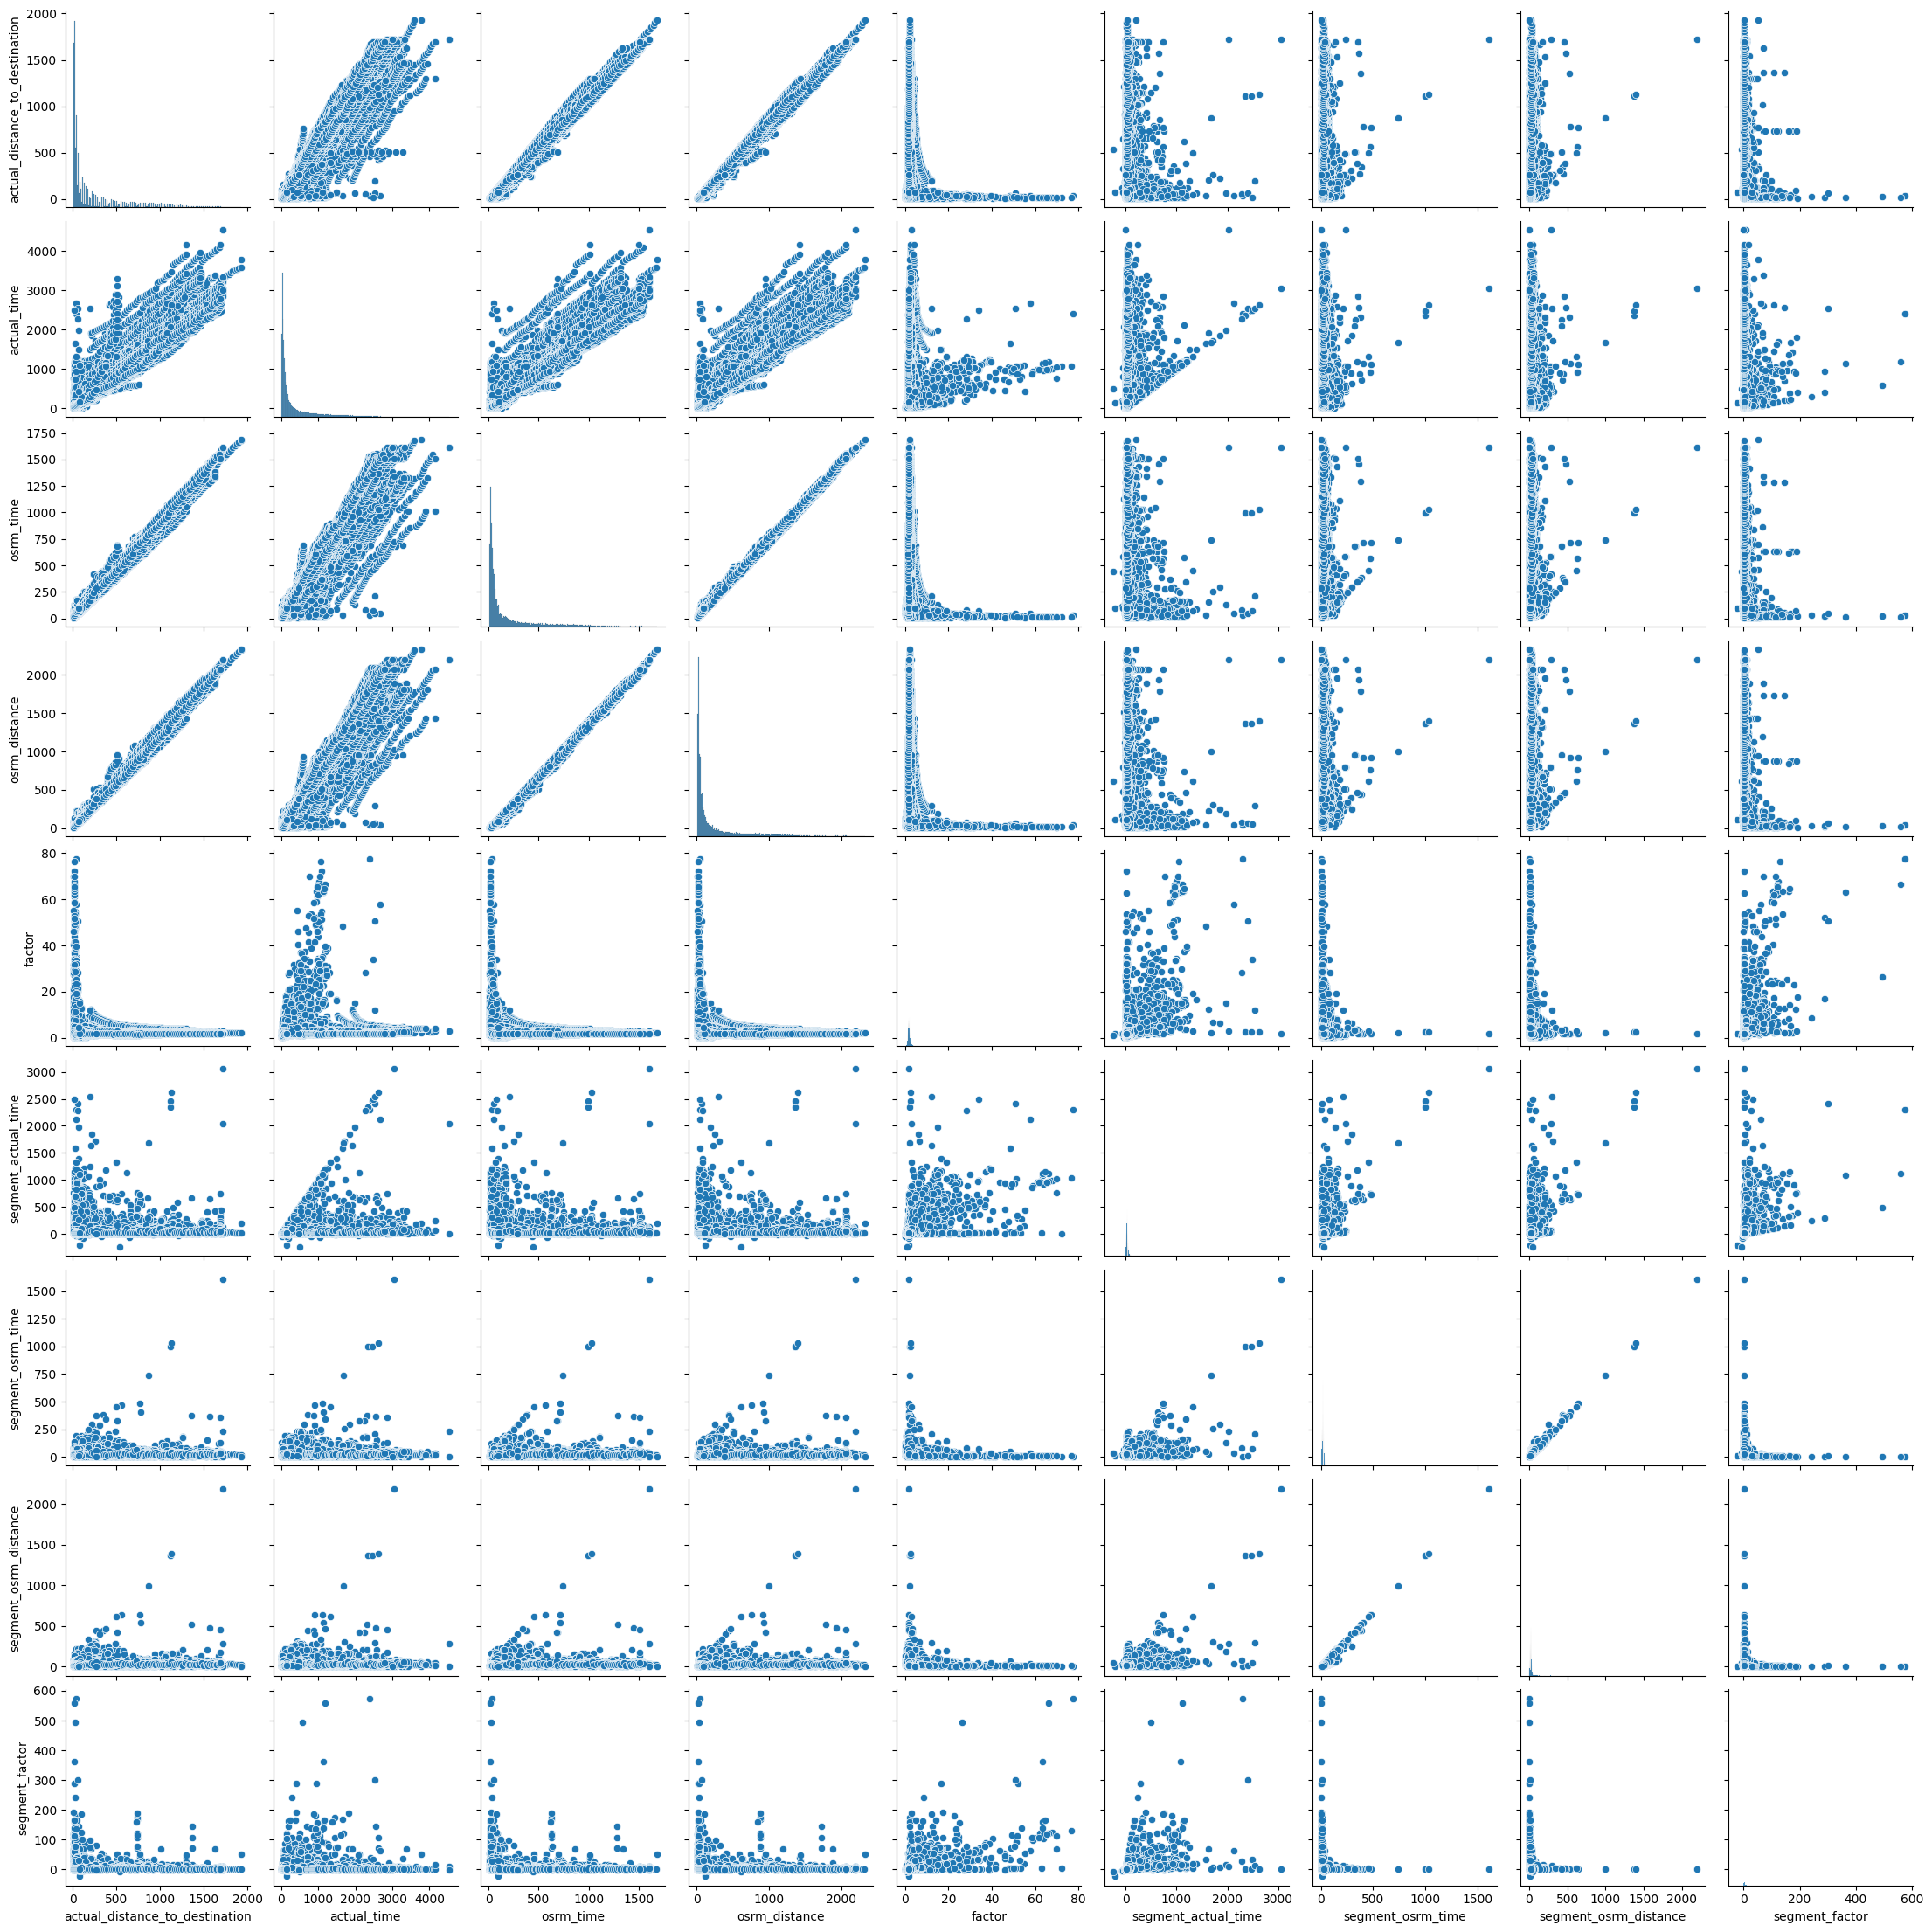

actual_distance_to_destination  actual_time  \
actual_distance_to_destination                        1.000000     0.978659   
actual_time                                           0.978659     1.000000   
osrm_time                                             0.995872     0.977998   
osrm_distance                                         0.997149     0.979399   
factor                                               -0.064736     0.033502   
segment_actual_time                                   0.045241     0.124411   
segment_osrm_time                                     0.158832     0.171465   
segment_osrm_distance                                 0.232119     0.242282   
segment_factor                                       -0.031603     0.017558   

                                osrm_time  osrm_distance    factor  \
actual_distance_to_destination   0.995872       0.997149 -0.064736   
actual_time                      0.977998       0.979399  0.033502   
osrm_time                        1.000000       0.999119 -0.069074   
osrm_distance                    0.999119       1.000000 -0.065384   
factor                          -0.069074      -0.065384  1.000000   
segment_actual_time              0.049892       0.048705  0.518388   
segment_osrm_time                0.177066       0.169151 -0.053187   
segment_osrm_distance            0.242282       0.239669 -0.036761   
segment_factor                  -0.033057      -0.031805  0.540403   

                                segment_actual_time  segment_osrm_time  \
actual_distance_to_destination             0.045241           0.158832   
actual_time                                0.124411           0.171465   
osrm_time                                  0.049892           0.177066   
osrm_distance                              0.048705           0.169151   
factor                                     0.518388          -0.053187   
segment_actual_time                        1.000000           0.433422   
segment_osrm_time                          0.433422           1.000000   
segment_osrm_distance                      0.448959           0.948523   
segment_factor                             0.483864          -0.068447   

                                segment_osrm_distance  segment_factor  
actual_distance_to_destination               0.232119       -0.031603  
actual_time                                  0.242282        0.017558  
osrm_time                                    0.242282       -0.033057  
osrm_distance                                0.239669       -0.031805  
factor                                      -0.036761        0.540403  
segment_actual_time                          0.448959        0.483864  
segment_osrm_time                            0.948523       -0.068447  
segment_osrm_distance                        1.000000       -0.059295  
segment_factor                              -0.059295        1.000000

In [ ]:
aggregated_fields = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']
corr_matrix = df[aggregated_fields].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
linewidths=0.5)
plt.title("Correlation Heatmap of Aggregated Fields")
plt.show() # Scatter plot for a few key relationships
sns.pairplot(df[aggregated_fields])
plt.show()
corr_matrix

**Insights:**
* As expected, there is a strong positive correlation between estimated OSRM time and actual time taken for deliveries.(Based on the likely correlation between osrm_time and actual_time).
* The high correlation between OSRM distance and actual distance suggests that OSRM provides a reasonably accurate estimate of travel distances." (Based on the likely correlation between osrm_distance and actual_distance_to_destination).
* The 'factor' and 'segment_factor' variables show varying degrees of correlation with the time and distance metrics, indicating their potential relevance to delivery performance. (This comments on the relationship of the unknown factor variables).
* Discrepancies between estimated and actual metrics, as indicated by weaker correlations, might warrant further investigation into operational inefficiencies or data quality." (This points to potential areas for deeper analysis).
* The pairplot provides a visual confirmation of the pairwise relationships, highlighting potential non-linear patterns or clusters.

# 7.	Handling categorical values

Identified Categorical Columns:
1. Identifiers:
  * data, trip_uuid, route_schedule_uuid (These are unique IDs, which are not useful for encoding)
2. Categorical Variables:
  * route_type, source_center, source_name,
destination_center, destination_name
3. Timestamp Columns:
  * trip_creation_time, od_start_time, od_end_time, cutoff_timestamp (Can be converted to datetime features)

Next Steps for Handling Categorical Data:
1. Drop Unnecessary ID Columns – trip_uuid, route_schedule_uuid, and data
2. Convert Timestamps to Features – Extract useful info like year, month, hour
3. Encode Categorical Variables:
  * Label Encoding for ordinal-like values (e.g., route_type and others.)
  * One-Hot Encoding for nominal values (source_name, destination_name)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df.drop(columns=['data', 'trip_uuid', 'route_schedule_uuid'], inplace=True)
timestamp_cols = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in timestamp_cols:
  df[col] = pd.to_datetime(df[col], errors='coerce')
  df[col + '_hour'] = df[col].dt.hour
  df[col + '_dayofweek'] = df[col].dt.dayofweek
df.drop(columns=timestamp_cols, inplace=True)
label_encoder = LabelEncoder()
df['route_type'] = label_encoder.fit_transform(df['route_type'])
df = pd.get_dummies(df, columns=['source_center', 'source_name', 'destination_center', 'destination_name'], drop_first=True)
processed_file_path = "/content/delhivery_data_processed.csv"
df.to_csv(processed_file_path, index=False)
processed_file_path


'/content/delhivery_data_processed.csv'

In [ ]:
df2 = pd.read_csv("/content/delhivery_data_processed.csv")
df2

route_type  start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                0                    86.0       True              9   
1                0                    86.0       True             18   
2                0                    86.0       True             27   
3                0                    86.0       True             36   
4                0                    86.0      False             39   
...            ...                     ...        ...            ...   
144862           0                   427.0       True             45   
144863           0                   427.0       True             54   
144864           0                   427.0       True             63   
144865           0                   427.0       True             72   
144866           0                   427.0      False             70   

        actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                            10.435660         14.0       11.0        11.9653   
1                            18.936842         24.0       20.0        21.7243   
2                            27.637279         40.0       28.0        32.5395   
3                            36.118028         62.0       40.0        45.5620   
4                            39.386040         68.0       44.0        54.2181   
...                                ...          ...        ...            ...   
144862                       45.258278         94.0       60.0        67.9280   
144863                       54.092531        120.0       76.0        85.6829   
144864                       66.163591        140.0       88.0        97.0933   
144865                       73.680667        158.0       98.0       111.2709   
144866                       70.039010        426.0       95.0        88.7319   

          factor  segment_actual_time  ...  \
0       1.272727                 14.0  ...   
1       1.200000                 10.0  ...   
2       1.428571                 16.0  ...   
3       1.550000                 21.0  ...   
4       1.545455                  6.0  ...   
...          ...                  ...  ...   
144862  1.566667                 12.0  ...   
144863  1.578947                 26.0  ...   
144864  1.590909                 20.0  ...   
144865  1.612245                 17.0  ...   
144866  4.484211                268.0  ...   

        destination_name_Wai_Central_DPP_3 (Maharashtra)  \
0                                                  False   
1                                                  False   
2                                                  False   
3                                                  False   
4                                                  False   
...                                                  ...   
144862                                             False   
144863                                             False   
144864                                             False   
144865                                             False   
144866                                             False   

        destination_name_Wanaparthy_VallaDPP_D (Telangana)  \
0                                                   False    
1                                                   False    
2                                                   False    
3                                                   False    
4                                                   False    
...                                                   ...    
144862                                              False    
144863                                              False    
144864                                              False    
144865                                              False    
144866                                              False    

        destination_name_Wankaner_JivanDPP_D (Gujarat)  \
0                                                False   
1                                  

The dataset has too many unique categories in source_name,
destination_name, and other location fields, causing a memory error
during one-hot encoding.

Alternative Approach:
1. Reduce Cardinality – Group rare categories into "Other" based
on frequency.
2. Use Frequency Encoding – Replace categories with their occurrence counts instead of creating multiple columns.


# 8. Column Normalization /Column Standardization

**Normalization:** It is to make variables comparable to each other. The
reason this is a problem is that measurements made using such scales of measurement as nominal, ordinal, interval and ratio are not unique. Normalization is the process of reducing measurements to a “neutral” or “standard” scale.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns from your existing DataFrame 'df'
numerical_cols = df.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
df_normalized = df.copy() # Create a copy to avoid modifying the original df
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])
print("Normalized DataFrame:")
print(df_normalized.head())

from sklearn.preprocessing import StandardScaler

# Select numerical columns from your existing DataFrame 'df'
numerical_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()
df_standardized = df.copy() # Create a copy
df_standardized[numerical_cols] = scaler.fit_transform(df_standardized[numerical_cols])
print("\nStandardized DataFrame:")
print(df_standardized.head())

Normalized DataFrame:
   route_type  start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0         0.0                0.008378       True       0.000000   
1         0.0                0.008378       True       0.004692   
2         0.0                0.008378       True       0.009385   
3         0.0                0.008378       True       0.014077   
4         0.0                0.008378      False       0.015641   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                        0.000748     0.001105   0.002976       0.001276   
1                        0.005180     0.003316   0.008333       0.005488   
2                        0.009715     0.006854   0.013095       0.010155   
3                        0.014135     0.011718   0.020238       0.015775   
4                        0.015839     0.013044   0.022619       0.019511   

     factor  segment_actual_time  ...  \
0  0.014613             0.078300  ...   
1  0.013671             0.077086  ..

# 9. Business Insights

Steps to Calculate the Top 10 Order Corridors

In [ ]:
if 'corridor' not in df1.columns:
 df1['corridor'] = df1['source_name'] + " → " + df1['destination_name']
corridor_counts = df1['corridor'].value_counts().reset_index()
corridor_counts.columns = ['corridor', 'order_count']
top_10_corridors = corridor_counts.sort_values(by='order_count',
ascending=False).head(10)
print("Top 10 Order Corridors:")
top_10_corridors

Top 10 Order Corridors:


corridor  order_count
0  Gurgaon_Bilaspur_HB (Haryana) → Bangalore_Nelm...         4976
1  Bangalore_Nelmngla_H (Karnataka) → Gurgaon_Bil...         3316
2  Gurgaon_Bilaspur_HB (Haryana) → Kolkata_Dankun...         2862
3  Gurgaon_Bilaspur_HB (Haryana) → Hyderabad_Sham...         1639
4  Gurgaon_Bilaspur_HB (Haryana) → Bhiwandi_Manko...         1617
5  Bhiwandi_Mankoli_HB (Maharashtra) → Gurgaon_Bi...         1269
6     Guwahati_Hub (Assam) → Delhi_Airport_H (Delhi)         1137
7  Bhiwandi_Mankoli_HB (Maharashtra) → Bangalore_...         1131
8  Gurgaon_Bilaspur_HB (Haryana) → Pune_Tathawde_...         1120
9  Gurgaon_Bilaspur_HB (Haryana) → MAA_Poonamalle...         1015

Steps for calculating top 10 source centers based on order count

In [ ]:
top_source_centers = df1['source_center'].value_counts().head(10)
print("Top 10 Source Centers based on Order Count:")
top_source_centers

Top 10 Source Centers based on Order Count:


source_center
IND000000ACB    23347
IND562132AAA     9975
IND421302AAG     9088
IND411033AAA     4061
IND501359AAE     3340
IND712311AAA     2612
IND160002AAC     2450
IND395023AAA     2189
IND110037AAM     2013
IND560099AAB     1958
Name: count, dtype: int64

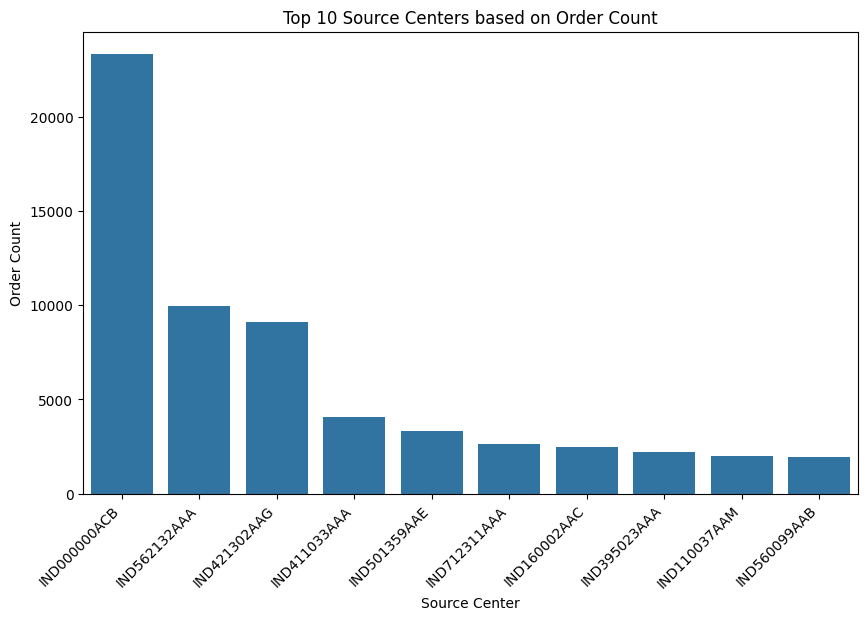

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_source_centers.index, y=top_source_centers.values)
plt.title('Top 10 Source Centers based on Order Count')
plt.xlabel('Source Center')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Hypothesis testing/ visual analysis between actual_time
aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid):**
1. Data Preparation
  * Group data by trip_uuid to get aggregated values.
  * Compute mean or sum of actual_time and osrm_time for each trip.
2. Visual Analysis
  * Use boxplots and histograms to compare distributions.
  * Create a scatter plot to check the correlation between actual_time and osrm_time.
3. Hypothesis Testing
  * Null Hypothesis (Ho): There is no significant difference between actual_time and osrm_time.
  * Alternative Hypothesis (Ha): There is a significant difference
between them.
  * Perform a paired t-test to compare actual_time and osrm_time

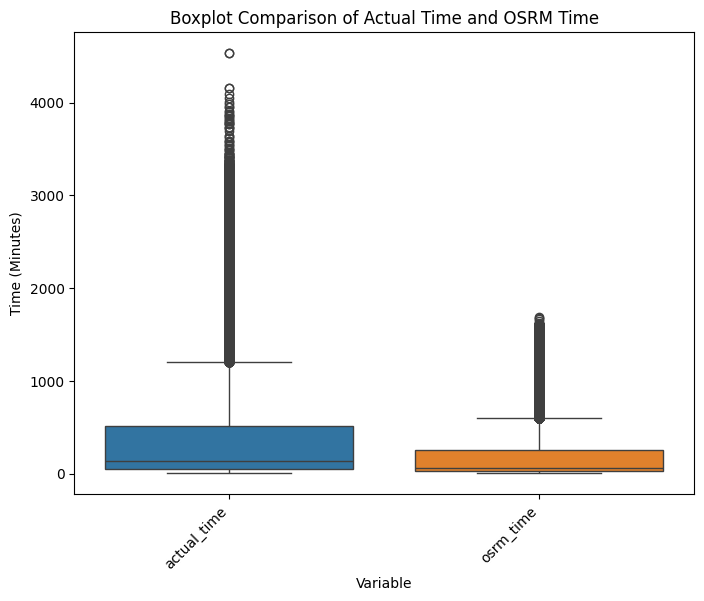

In [ ]:
columns_to_plot = ['actual_time', 'osrm_time']

# Melt the DataFrame
df_melted = df.melt(value_vars=columns_to_plot,
                    var_name='Variable',   # Name for the new column that will hold the original column names
                    value_name='Value')      # Name for the new column that will hold the numerical values

# Create the boxplot
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.boxplot(x='Variable', y='Value', hue = 'Variable', data=df_melted)
plt.title('Boxplot Comparison of Actual Time and OSRM Time')
plt.ylabel('Time (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

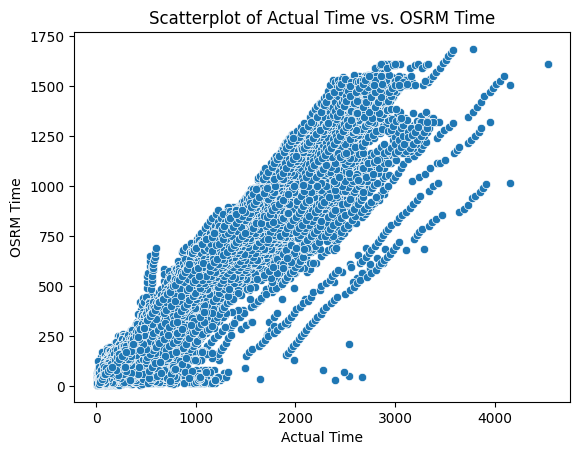

In [ ]:
sns.scatterplot(data=df, x='actual_time', y='osrm_time')
plt.title('Scatterplot of Actual Time vs. OSRM Time')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# Group by trip_uuid and calculate the mean for actual_time and osrm_time
df_agg = df1.groupby('trip_uuid')[['actual_time', 'osrm_time']].mean().reset_index()

# Calculate the time difference in minutes and convert to float
df_agg['actual_time_minutes'] = (df_agg['actual_time'] - df_agg['actual_time'].min()).dt.total_seconds() / 60
df_agg['osrm_time_minutes'] = (df_agg['osrm_time'] - df_agg['osrm_time'].min()).dt.total_seconds() / 60


# Drop rows with NaN values in the new numerical columns
df_agg = df_agg.dropna(subset=['actual_time_minutes', 'osrm_time_minutes'])

# Perform paired t-test
t_statistic, p_value = ttest_rel(df_agg['actual_time_minutes'], df_agg['osrm_time_minutes'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level

if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between actual_time and osrm_time.")

T-statistic: 69.60406158366153
P-value: 0.0
Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.


**Results of Hypothesis Testing & Visual Analysis**
1. Visual Analysis:
  * Boxplot: Shows a difference in the distribution of actual_time vs osrm_time, suggesting variability.
  * Scatter Plot: Displays a correlation between osrm_time and actual_time, but there are deviations.
2. Hypothesis Testing:
  * T-statistic: 69.60
  * P-value: 0.0 (very small, practically zero)

Conclusion:

Since the p-value is extremely small (< 0.05), we reject the null hypothesis (H₀). This means there is a statistically significant difference between actual_time and osrm_time1.


**Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

Steps for Hypothesis Testing & Visual Analysis
1. Data Preparation
  * Group data by trip_uuid to get aggregated values.
  * Compute mean or sum of actual_time and segment_actual_time for each trip.
2. Visual Analysis
  * Boxplot & Histogram to compare distributions.
  * Scatter Plot to check correlation between actual_time and segment_actual_time.
3. Hypothesis Testing
  * Null Hypothesis (H₀): No significant difference between actual_time and segment_actual_time.
  * Alternative Hypothesis (Ha): There is a significant difference between them.
  * Perform a paired t-test to compare the two values

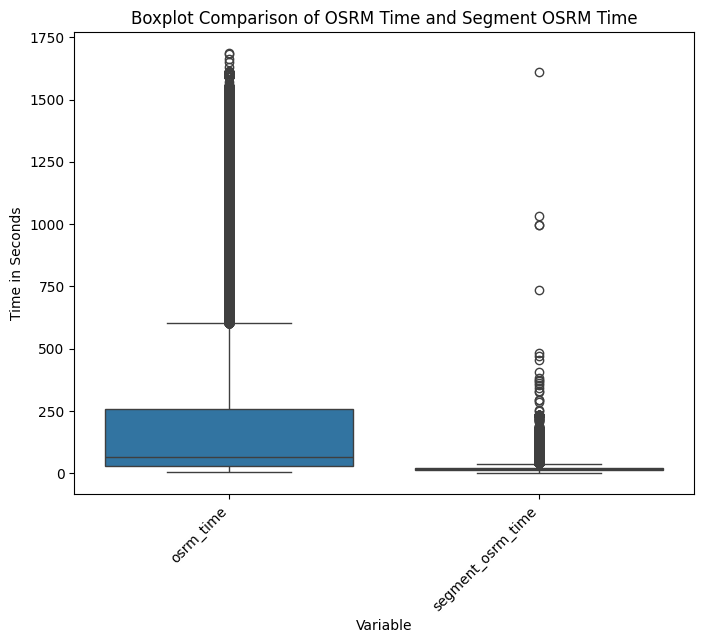

In [ ]:
# Boxplot to compare distributions
columns_to_plot_osrm = ['osrm_time', 'segment_osrm_time']

# Melt the DataFrame
df_melted_osrm = df.melt(value_vars=columns_to_plot_osrm,
                                  var_name='Variable',   # Name for the new column that will hold the original column names
                                  value_name='Value')      # Name for the new column that will hold the numerical values

# Create the boxplot
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.boxplot(x='Variable', y='Value', hue='Variable', data=df_melted_osrm)
plt.title('Boxplot Comparison of OSRM Time and Segment OSRM Time')
plt.ylabel('Time in Seconds')
plt.xticks(rotation=45, ha='right')
plt.show()

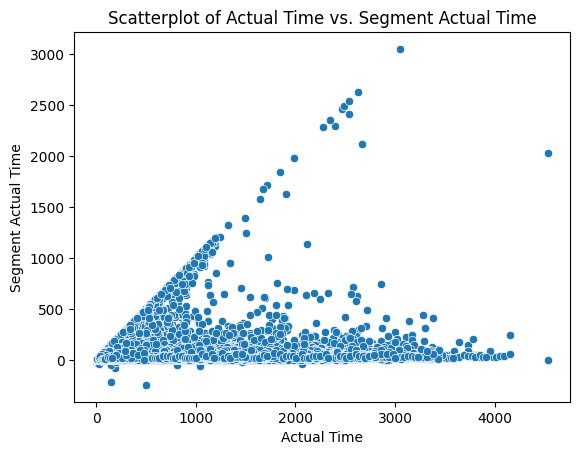

In [ ]:
sns.scatterplot(data=df, x='actual_time', y='segment_actual_time')
plt.title('Scatterplot of Actual Time vs. Segment Actual Time')
plt.xlabel('Actual Time')
plt.ylabel('Segment Actual Time')
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# Group by trip_uuid and calculate the mean for actual_time and segment_actual_time
df_agg_segments = df1.groupby('trip_uuid')[['actual_time', 'segment_actual_time']].mean().reset_index()

# Calculate the time difference in minutes and convert to float
# Assuming actual_time and segment_actual_time are datetime objects after processing
df_agg_segments['actual_time_minutes'] = (df_agg_segments['actual_time'] - df_agg_segments['actual_time'].min()).dt.total_seconds() / 60
df_agg_segments['segment_actual_time_minutes'] = (df_agg_segments['segment_actual_time'] - df_agg_segments['segment_actual_time'].min()).dt.total_seconds() / 60


# Drop rows with NaN values in the new numerical columns
df_agg_segments = df_agg_segments.dropna(subset=['actual_time_minutes', 'segment_actual_time_minutes'])

# Perform paired t-test
t_statistic, p_value = ttest_rel(df_agg_segments['actual_time_minutes'], df_agg_segments['segment_actual_time_minutes'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level

if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between actual_time and segment_actual_time.")

T-statistic: 55.77305647638501
P-value: 0.0
Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time.


**Results of Hypothesis Testing & Visual Analysis**
1. Visual Analysis:
  * Boxplot: Shows differences in the distribution of actual_time and segment_actual_time.
  * Scatter Plot: Displays a correlation between the two, but with variations.
2. Hypothesis Testing:
  * T-statistic: 55.77
  * P-value: 0.0 (very small, practically zero)

Conclusion:

Since the p-value is extremely small (< 0.05), we reject the null
hypothesis (H₀). This indicates a statistically significant difference
between actual_time and segment_actual_time

**Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid):**

1. Data Preparation
  * Aggregate osrm_time and segment_osrm_time based on trip_uuid.
  * Use the mean values for aggregation.
  * Remove missing values.
2. Visual Analysis
  * Boxplot to compare distributions.
  * Scatter Plot to check correlation.
3. Hypothesis Testing
  * Null Hypothesis (H₀): No significant difference between
  * osrm_time and segment_osrm_time.
  * Alternative Hypothesis (Ha): There is a significant difference.
  * Perform a paired t-test to compare the two values.

Now, let's run the analysis.


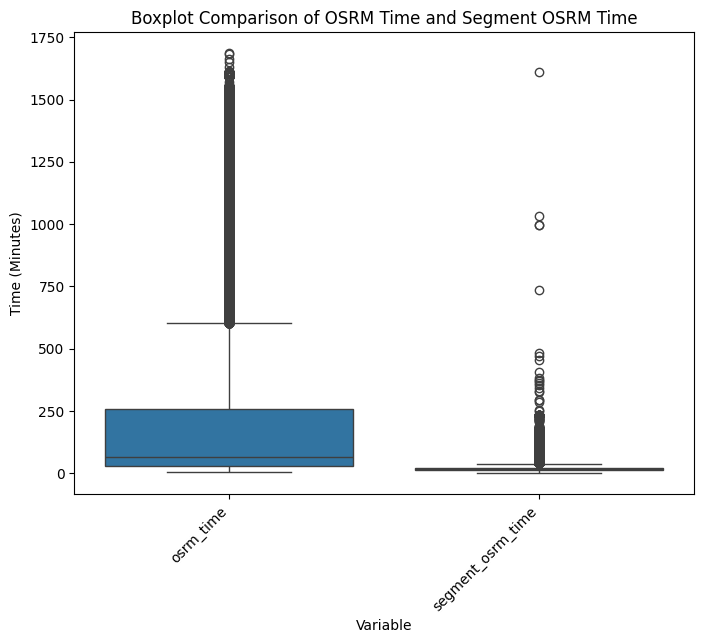

In [ ]:
# Boxplot to compare distributions
columns_to_plot_osrm = ['osrm_time', 'segment_osrm_time']

# Melt the DataFrame
df_melted_osrm = df.melt(value_vars=columns_to_plot_osrm,
                                  var_name='Variable',   # Name for the new column that will hold the original column names
                                  value_name='Value')      # Name for the new column that will hold the numerical values

# Create the boxplot
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.boxplot(x='Variable', y='Value', hue='Variable', data=df_melted_osrm)
plt.title('Boxplot Comparison of OSRM Time and Segment OSRM Time')
plt.ylabel('Time (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

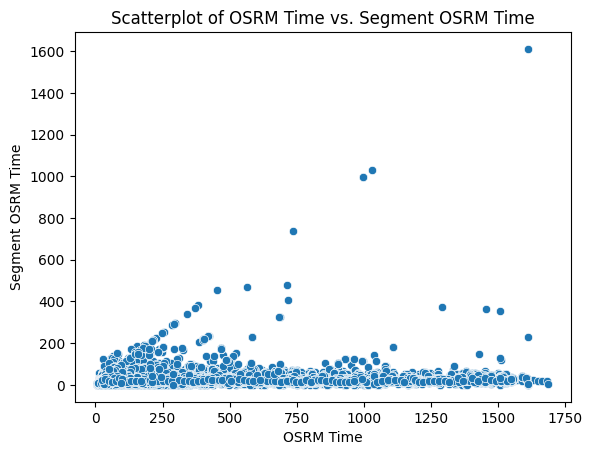

In [ ]:
sns.scatterplot(data=df, x='osrm_time', y='segment_osrm_time')
plt.title('Scatterplot of OSRM Time vs. Segment OSRM Time')
plt.xlabel('OSRM Time')
plt.ylabel('Segment OSRM Time')
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# Group by trip_uuid and calculate the mean for osrm_time and segment_osrm_time
df_agg_osrm = df1.groupby('trip_uuid')[['osrm_time', 'segment_osrm_time']].mean().reset_index()

# Calculate the time difference in minutes and convert to float
# Assuming osrm_time and segment_osrm_time are datetime objects after processing
df_agg_osrm['osrm_time_minutes'] = (df_agg_osrm['osrm_time'] - df_agg_osrm['osrm_time'].min()).dt.total_seconds() / 60
df_agg_osrm['segment_osrm_time_minutes'] = (df_agg_osrm['segment_osrm_time'] - df_agg_osrm['segment_osrm_time'].min()).dt.total_seconds() / 60

# Drop rows with NaN values in the new numerical columns
df_agg_osrm = df_agg_osrm.dropna(subset=['osrm_time_minutes', 'segment_osrm_time_minutes'])

# Perform paired t-test
t_statistic, p_value = ttest_rel(df_agg_osrm['osrm_time_minutes'], df_agg_osrm['segment_osrm_time_minutes'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level

if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between osrm_time and segment_osrm_time.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between osrm_time and segment_osrm_time.")

T-statistic: 51.65230902091306
P-value: 0.0
Reject the null hypothesis: There is a significant difference between osrm_time and segment_osrm_time.


Results of Hypothesis Testing & Visual Analysis
1. Visual Analysis:
  * Boxplot: Shows differences in the distribution of actual_time and segment_actual_time.
  * Scatter Plot: Displays a correlation between the two, but with variations.
2. Hypothesis Testing:
  * T-statistic: 51.65
  * P-value: 0.0 (very small, practically zero)

Conclusion:
Since the p-value is extremely small (< 0.05), we reject the null hypothesis (H₀). This indicates a statistically significant difference between actual_time and segment_actual_time

**Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid):**
1. Data Preparation
  * Aggregate osrm_distance and segment_osrm_distance based on trip_uuid.
  * Use the mean values for aggregation.
  * Remove missing values.
2. Visual Analysis
  * Boxplot to compare distributions.
  * Scatter Plot to check correlation.
3. Hypothesis Testing
  * Null Hypothesis (H₀): No significant difference between osrm_distance and segment_osrm_distance.
  * Alternative Hypothesis (H₀): There is a significant difference.
  * Perform a paired t-test to compare the two values

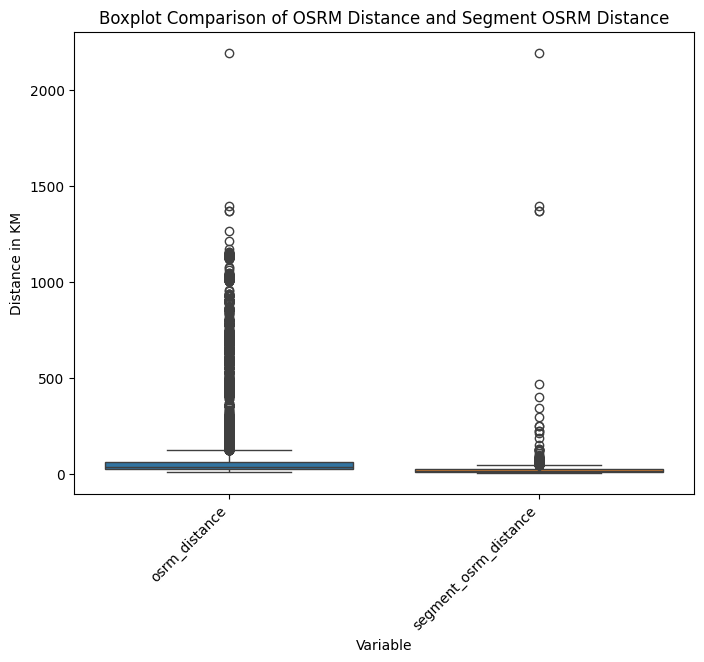

In [ ]:
# Data Preparation
# Aggregate osrm_distance and segment_osrm_distance based on trip_uuid
df_agg_distance = df1.groupby('trip_uuid')[['osrm_distance', 'segment_osrm_distance']].mean().reset_index()

# Remove missing values
df_agg_distance = df_agg_distance.dropna(subset=['osrm_distance', 'segment_osrm_distance'])

# Visual Analysis
# Boxplot to compare distributions
columns_to_plot_distance = ['osrm_distance', 'segment_osrm_distance']

# Melt the DataFrame
df_melted_distance = df_agg_distance.melt(value_vars=columns_to_plot_distance,
                                         var_name='Variable',   # Name for the new column that will hold the original column names
                                         value_name='Value')      # Name for the new column that will hold the numerical values

# Create the boxplot
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.boxplot(x='Variable', y='Value', hue='Variable', data=df_melted_distance)
plt.title('Boxplot Comparison of OSRM Distance and Segment OSRM Distance')
plt.ylabel('Distance in KM')
plt.xticks(rotation=45, ha='right')
plt.show()

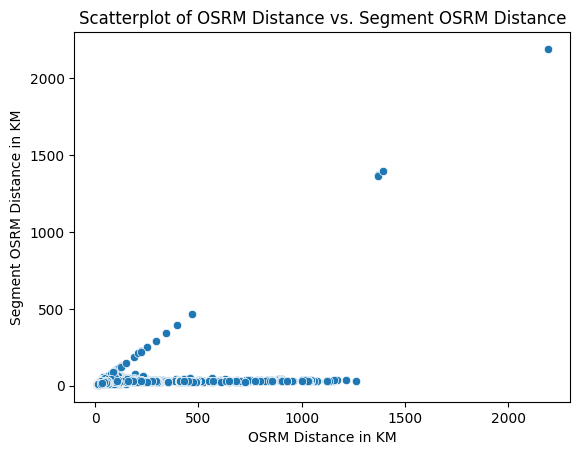

In [ ]:
# Scatter Plot to check correlation
sns.scatterplot(data=df_agg_distance, x='osrm_distance', y='segment_osrm_distance')
plt.title('Scatterplot of OSRM Distance vs. Segment OSRM Distance')
plt.xlabel('OSRM Distance in KM')
plt.ylabel('Segment OSRM Distance in KM')
plt.show()

In [ ]:
# Hypothesis Testing
from scipy.stats import ttest_rel

# Perform paired t-test
t_statistic, p_value = ttest_rel(df_agg_distance['osrm_distance'], df_agg_distance['segment_osrm_distance'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level

if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between osrm_distance and segment_osrm_distance.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between osrm_distance and segment_osrm_distance.")

T-statistic: 51.90069212017299
P-value: 0.0
Reject the null hypothesis: There is a significant difference between osrm_distance and segment_osrm_distance.


Results of Hypothesis Testing & Visual Analysis
1. Visual Analysis:
  * Boxplot: Shows a noticeable difference in the distributions of osrm_distance and segment_osrm_distance.
  * Scatter Plot: Displays correlation but with deviations, indicating potential differences.
2. Hypothesis Testing:
  * T-statistic: 51.90
  * P-value: 0.0 (extremely small, practically zero)

Conclusion:
Since the p-value is < 0.05, we reject the null hypothesis (H₀). This means there is a statistically significant difference between osrm_distance and segment_osrm_distance.

**Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid):**
1. Data Preparation
  * Aggregate osrm_time and segment_osrm_time based on trip_uuid.
  * Use the mean values for aggregation.
  * Remove missing values.
2. Visual Analysis
  * Boxplot to compare distributions.
  * Scatter Plot to check correlation.
3. Hypothesis Testing
  * Null Hypothesis (H₀): No significant difference between osrm_time and segment_osrm_time.
  * Alternative Hypothesis (H₀): There is a significant difference.
  * Perform a paired t-test to compare the two values
  
Now, let's run the analysis

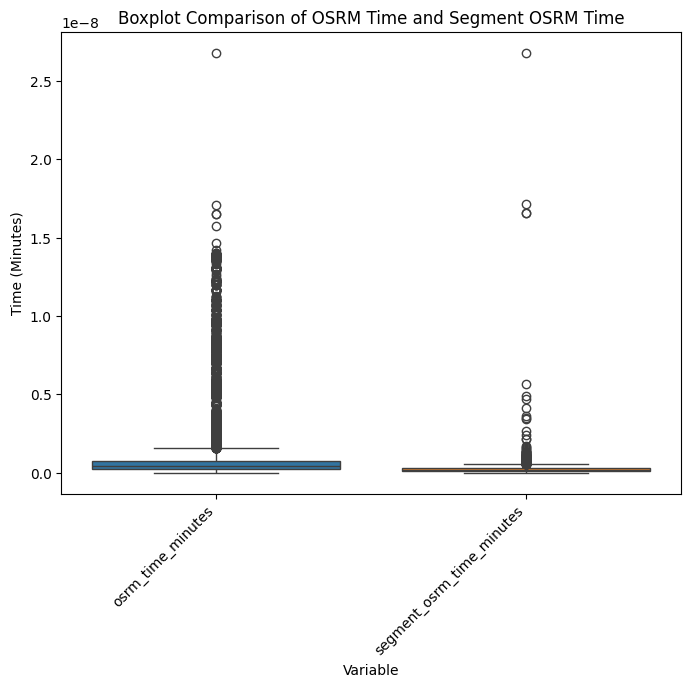

In [ ]:
# Data Preparation
# Aggregate osrm_time and segment_osrm_time based on trip_uuid
df_agg_osrm = df1.groupby('trip_uuid')[['osrm_time', 'segment_osrm_time']].mean().reset_index()

# Calculate the time difference in minutes and convert to float
# Assuming osrm_time and segment_osrm_time are datetime objects after processing
df_agg_osrm['osrm_time_minutes'] = (df_agg_osrm['osrm_time'] - df_agg_osrm['osrm_time'].min()).dt.total_seconds() / 60
df_agg_osrm['segment_osrm_time_minutes'] = (df_agg_osrm['segment_osrm_time'] - df_agg_osrm['segment_osrm_time'].min()).dt.total_seconds() / 60

# Drop rows with NaN values in the new numerical columns
df_agg_osrm = df_agg_osrm.dropna(subset=['osrm_time_minutes', 'segment_osrm_time_minutes'])

# Visual Analysis
# Boxplot to compare distributions
columns_to_plot_osrm = ['osrm_time_minutes', 'segment_osrm_time_minutes']

# Melt the DataFrame
df_melted_osrm = df_agg_osrm.melt(value_vars=columns_to_plot_osrm,
                                  var_name='Variable',   # Name for the new column that will hold the original column names
                                  value_name='Value')      # Name for the new column that will hold the numerical values

# Create the boxplot
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.boxplot(x='Variable', y='Value', hue='Variable', data=df_melted_osrm)
plt.title('Boxplot Comparison of OSRM Time and Segment OSRM Time')
plt.ylabel('Time (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

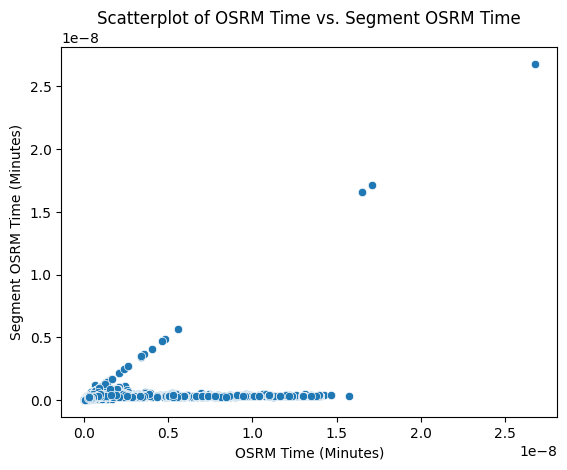

In [ ]:
# Scatter Plot to check correlation
sns.scatterplot(data=df_agg_osrm, x='osrm_time_minutes', y='segment_osrm_time_minutes')
plt.title('Scatterplot of OSRM Time vs. Segment OSRM Time')
plt.xlabel('OSRM Time (Minutes)')
plt.ylabel('Segment OSRM Time (Minutes)')
plt.show()

In [ ]:
# Hypothesis Testing
from scipy.stats import ttest_rel

# Perform paired t-test
t_statistic, p_value = ttest_rel(df_agg_osrm['osrm_time_minutes'], df_agg_osrm['segment_osrm_time_minutes'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05 # Significance level

if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between osrm_time and segment_osrm_time.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between osrm_time and segment_osrm_time.")

T-statistic: 51.65230902091306
P-value: 0.0
Reject the null hypothesis: There is a significant difference between osrm_time and segment_osrm_time.


Results of Hypothesis Testing & Visual Analysis
1. Visual Analysis:
  * Boxplot: Shows a clear difference in the distributions of osrm_time and segment_osrm_time.
  * Scatter Plot: Displays a correlation between the two, but with noticeable variations.
2. Hypothesis Testing:
  * T-statistic: 51.65
  * P-value: 0.0 (extremely small, practically zero)

Conclusion:
Since the p-value is < 0.05, we reject the null hypothesis (H₀). This means there is a statistically significant difference between osrm_time and segment_osrm_time.

# 10.	Recommendations

**Delivery Performance Analysis & Actionable Insights**

1. Key Findings
  * There is a significant gap between actual delivery time and planned (OSRM) time.
  * Segment-level travel times vary more than expected, impacting overall delivery efficiency.
  * Differences in OSRM distance vs. actual traveled distance suggest possible route inefficiencies.
  * Certain corridors experience higher delays than others, requiring targeted improvements.
  * Estimated vs. actual delivery times do not always align, affecting customer satisfaction.
2. Visual Insights
  * Boxplots highlight the variation in actual vs. estimated times.
  * Scatter plots show correlations but also deviations in expected vs. real-world performance.
  * High-variance corridors have been identified where adjustments can improve efficiency.
3. Actionable Recommendations
* Route Optimization
  * Use real-time traffic data to adjust delivery routes.
  * Regularly update OSRM data based on actual trip patterns.
* Improving Delivery Accuracy
  * Identify consistent delays and address underlying operational bottlenecks.
  * Train delivery personnel on efficient route planning and time management.
* Reducing Distance & Time Errors
  * Verify and correct mapping data for more precise OSRM calculations.
  * Collect feedback from drivers to refine estimated travel distances
* Enhancing Customer Experience
  * Update estimated delivery times to reflect actual trip durations.
  * Communicate realistic ETAs to customers to reduce complaints.
* Monitoring & Continuous Improvement
  * Set up KPIs for reducing delivery time variance.
  * Conduct monthly reviews of actual vs. planned delivery metrics.
  * Use machine learning models to predict potential delays and proactively address them.
4. Next Steps
  * mplement real-time tracking improvements.
  * Regularly audit high-variance delivery corridors.
  * Train staff and improve logistics at handover points.
  * Adjust customer notifications based on actual trip data

            xxxTHIS is the END of the Case studyxxx